<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Regression and Classification with the Ames Housing Data

---

You have just joined a new "full stack" real estate company in Ames, Iowa. The strategy of the firm is two-fold:
- Own the entire process from the purchase of the land all the way to sale of the house, and anything in between.
- Use statistical analysis to optimize investment and maximize return.

The company is still small, and though investment is substantial the short-term goals of the company are more oriented towards purchasing existing houses and flipping them as opposed to constructing entirely new houses. That being said, the company has access to a large construction workforce operating at rock-bottom prices.

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
%matplotlib inline 
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')
import seaborn as sns
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Estimating the value of homes from fixed characteristics.

---

Your superiors have outlined this year's strategy for the company:
1. Develop an algorithm to reliably estimate the value of residential houses based on *fixed* characteristics.
2. Identify characteristics of houses that the company can cost-effectively change/renovate with their construction team.
3. Evaluate the mean dollar value of different renovations.

Then we can use that to buy houses that are likely to sell for more than the cost of the purchase plus renovations.

Your first job is to tackle #1. You have a dataset of housing sale data with a huge amount of features identifying different aspects of the house. The full description of the data features can be found in a separate file:

    housing.csv
    data_description.txt
    
You need to build a reliable estimator for the price of the house given characteristics of the house that cannot be renovated. Some examples include:
- The neighborhood
- Square feet
- Bedrooms, bathrooms
- Basement and garage space

and many more. 

Some examples of things that **ARE renovate-able:**
- Roof and exterior features
- "Quality" metrics, such as kitchen quality
- "Condition" metrics, such as condition of garage
- Heating and electrical components

and generally anything you deem can be modified without having to undergo major construction on the house.

---

**Your goals:**
1. Perform any cleaning, feature engineering, and EDA you deem necessary.
- Be sure to remove any houses that are not residential from the dataset.
- Identify **fixed** features that can predict price.
- Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
- Characterize your model. How well does it perform? What are the best estimates of price?

> **Note:** The EDA and feature engineering component to this project is not trivial! Be sure to always think critically and creatively. Justify your actions! Use the data description file!

## EDA Section

In [2]:
# Load the data
house = pd.read_csv('./housing.csv')
house.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
house.shape

(1460, 81)

In [4]:
#Initial elimination as per question 1 requested

#We assume there is no duplicates as the unique number of the 'Id' equal to number of rows
house['Id'].nunique()

#remove any houses that are not residential from the dataset.
house = house[house['MSZoning'].str.contains('R')]
house['MSZoning'].value_counts()

RL    1151
RM     218
RH      16
Name: MSZoning, dtype: int64

In [5]:
#drop the 'Id' columns
house.drop('Id', inplace=True, axis=1)

In [6]:
for items in house:
    print items, house[items].nunique()

MSSubClass 15
MSZoning 3
LotFrontage 110
LotArea 1033
Street 2
Alley 2
LotShape 4
LandContour 4
Utilities 2
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
OverallQual 10
OverallCond 9
YearBuilt 112
YearRemodAdd 61
RoofStyle 6
RoofMatl 8
Exterior1st 15
Exterior2nd 16
MasVnrType 4
MasVnrArea 320
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 4
BsmtCond 4
BsmtExposure 4
BsmtFinType1 6
BsmtFinSF1 623
BsmtFinType2 6
BsmtFinSF2 144
BsmtUnfSF 756
TotalBsmtSF 704
Heating 6
HeatingQC 5
CentralAir 2
Electrical 5
1stFlrSF 728
2ndFlrSF 397
LowQualFinSF 22
GrLivArea 832
BsmtFullBath 4
BsmtHalfBath 3
FullBath 4
HalfBath 3
BedroomAbvGr 8
KitchenAbvGr 4
KitchenQual 4
TotRmsAbvGrd 12
Functional 7
Fireplaces 4
FireplaceQu 5
GarageType 6
GarageYrBlt 96
GarageFinish 3
GarageCars 5
GarageArea 433
GarageQual 5
GarageCond 5
PavedDrive 3
WoodDeckSF 269
OpenPorchSF 193
EnclosedPorch 118
3SsnPorch 20
ScreenPorch 75
PoolArea 8
PoolQC 3
Fence 4
MiscFeature 4
MiscVal 19
Mo

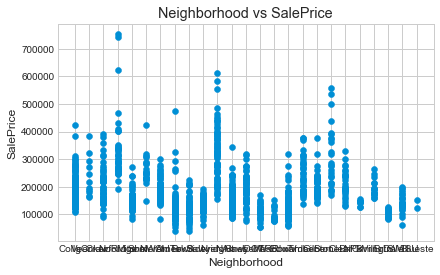

In [7]:
#Neighborhood
plt.scatter(house.Neighborhood, house.SalePrice)

plt.title("Neighborhood vs SalePrice")
plt.xlabel("Neighborhood")
plt.ylabel("SalePrice")
plt.show()

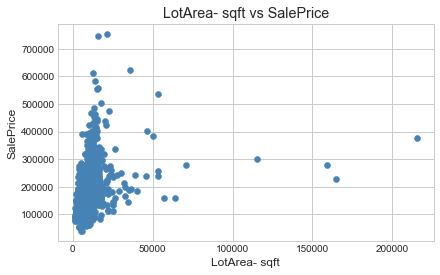

In [8]:
#In my opinion, the lot Area represent the total square of the land
plt.scatter(house.LotArea, house.SalePrice, c = "steelblue")

plt.title("LotArea- sqft vs SalePrice")
plt.xlabel("LotArea- sqft")
plt.ylabel("SalePrice")
plt.show()

      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
53            20       RL         68.0    50271   Pave   NaN      IR1   
66            20       RL          NaN    19900   Pave   NaN      Reg   
113           20       RL          NaN    21000   Pave   NaN      Reg   
120           80       RL          NaN    21453   Pave   NaN      IR1   
159           60       RL        134.0    19378   Pave   NaN      IR1   
171           20       RL        141.0    31770   Pave   NaN      IR1   
185           75       RM         90.0    22950   Pave   NaN      IR2   
197           75       RL        174.0    25419   Pave   NaN      Reg   
249           50       RL          NaN   159000   Pave   NaN      IR2   
260           80       RL        120.0    19296   Pave   NaN      Reg   
271           20       RL         73.0    39104   Pave   NaN      IR1   
277           20       RL        140.0    19138   Pave   NaN      Reg   
304           75       RM         87.0    18386   P

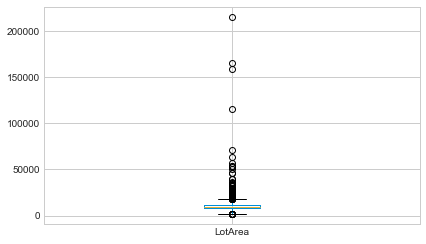

In [9]:
#Outlier is numerically defined by Q3 + 1.5*IQR or Q1 - 1.5*IQR
Q1 = house['LotArea'].quantile(0.25)
Q3 = house['LotArea'].quantile(0.75)
IQR = Q3 - Q1

#plot the plot chart and outlier
house['LotArea'].plot(kind='box')

# print out all the list of outlier
print house[house['LotArea'] >= Q3+1.5*IQR]
print house[house['LotArea'] <= Q1-1.5*IQR]

      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
53            20       RL         68.0    50271   Pave   NaN      IR1   
66            20       RL          NaN    19900   Pave   NaN      Reg   
113           20       RL          NaN    21000   Pave   NaN      Reg   
120           80       RL          NaN    21453   Pave   NaN      IR1   
159           60       RL        134.0    19378   Pave   NaN      IR1   
171           20       RL        141.0    31770   Pave   NaN      IR1   
185           75       RM         90.0    22950   Pave   NaN      IR2   
197           75       RL        174.0    25419   Pave   NaN      Reg   
249           50       RL          NaN   159000   Pave   NaN      IR2   
260           80       RL        120.0    19296   Pave   NaN      Reg   
271           20       RL         73.0    39104   Pave   NaN      IR1   
277           20       RL        140.0    19138   Pave   NaN      Reg   
304           75       RM         87.0    18386   P

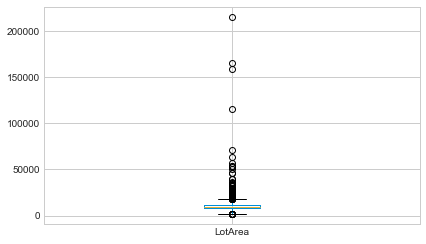

In [10]:
#Outlier is numerically defined by Q3 + 1.5*IQR or Q1 - 1.5*IQR
Q1 = house['LotArea'].quantile(0.25)
Q3 = house['LotArea'].quantile(0.75)
IQR = Q3 - Q1

#plot the plot chart and outlier
house['LotArea'].plot(kind='box')

# print out all the list of outlier
print house[house['LotArea'] >= Q3+1.5*IQR]
print house[house['LotArea'] <= Q1-1.5*IQR]


In [11]:
#Total bathroom and bedroom

#One of the half bathroom considered as half size of the full bathroom, hence, divided by 2

house['Total_bathroom_and_bedroom']= house['BsmtFullBath'] + 0.5*house['BsmtHalfBath'] + house['FullBath'] + 0.5*house['HalfBath'] + house['BedroomAbvGr']
house.drop('BsmtFullBath', inplace=True, axis=1)
house.drop('BsmtHalfBath', inplace=True, axis=1)
house.drop('FullBath', inplace=True, axis=1)
house.drop('HalfBath', inplace=True, axis=1)
house.drop('BedroomAbvGr', inplace=True, axis=1)

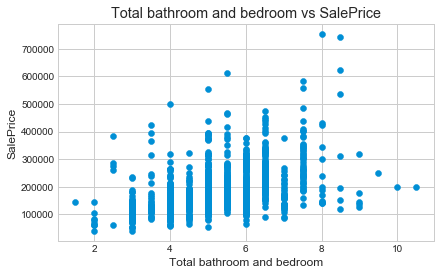

In [12]:
plt.scatter(x= house['Total_bathroom_and_bedroom'], y=house.SalePrice)

plt.title("Total bathroom and bedroom vs SalePrice")
plt.xlabel("Total bathroom and bedroom")
plt.ylabel("SalePrice")
plt.show()

      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
118           60       RL         90.0    12376   Pave   NaN      Reg   
144           90       RM         70.0     9100   Pave   NaN      Reg   
291          190       RL         55.0     5687   Pave  Grvl      Reg   
635          190       RH         60.0    10896   Pave  Pave      Reg   
738           90       RL         60.0    10800   Pave   NaN      Reg   
921           90       RL         67.0     8777   Pave   NaN      Reg   
1350          90       RL         91.0    11643   Pave   NaN      Reg   
1386          60       RL         80.0    16692   Pave   NaN      IR1   

     LandContour Utilities LotConfig             ...             PoolQC  \
118          Lvl    AllPub    Corner             ...                NaN   
144          Lvl    AllPub    Inside             ...                NaN   
291          Bnk    AllPub    Inside             ...                NaN   
635          Bnk    AllPub    Inside      

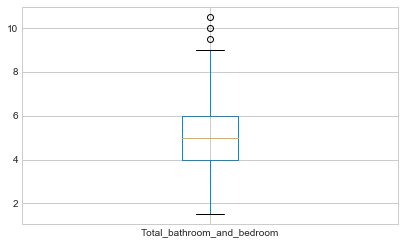

In [13]:
#Outlier is numerically defined by Q3 + 1.5*IQR or Q1 - 1.5*IQR
Q1 = house['Total_bathroom_and_bedroom'].quantile(0.25)
Q3 = house['Total_bathroom_and_bedroom'].quantile(0.75)
IQR = Q3 - Q1

#plot the plot chart and outlier
house['Total_bathroom_and_bedroom'].plot(kind='box')

# print out all the list of outlier
print house[house['Total_bathroom_and_bedroom'] >= Q3+1.5*IQR]
print house[house['Total_bathroom_and_bedroom'] <= Q1-1.5*IQR]

In [14]:
#Total basement and garage space


house['Total_basement_and_garage_space']= house['TotalBsmtSF'] + house['GarageArea']
house.drop('TotalBsmtSF', inplace=True, axis=1)
# house.drop('GarageArea', inplace=True, axis=1)

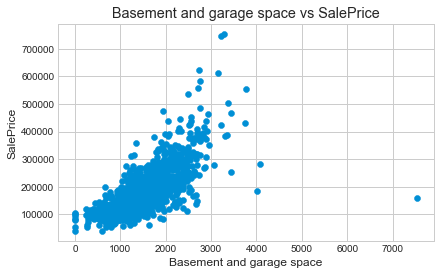

In [16]:
#Basement and garage space = Total square feet of basement and garage space

plt.scatter(x= house['Total_basement_and_garage_space'], y=house.SalePrice)

plt.title("Basement and garage space vs SalePrice")
plt.xlabel("Basement and garage space")
plt.ylabel("SalePrice")
plt.show()

      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
178           20       RL         63.0    17423   Pave   NaN      IR1   
224           20       RL        103.0    13472   Pave   NaN      Reg   
305           20       RL         80.0    10386   Pave   NaN      Reg   
332           20       RL         85.0    10655   Pave   NaN      IR1   
440           20       RL        105.0    15431   Pave   NaN      Reg   
473           20       RL        110.0    14977   Pave   NaN      IR1   
496           20       RL          NaN    12692   Pave   NaN      IR1   
515           20       RL         94.0    12220   Pave   NaN      Reg   
523           60       RL        130.0    40094   Pave   NaN      IR1   
581           20       RL         98.0    12704   Pave   NaN      Reg   
654           20       RL         91.0    10437   Pave   NaN      IR1   
664           20       RL         49.0    20896   Pave   NaN      IR2   
678           20       RL         80.0    11844   P

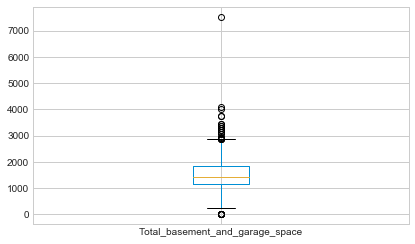

In [18]:
#Outlier is numerically defined by Q3 + 1.5*IQR or Q1 - 1.5*IQR
Q1 = house['Total_basement_and_garage_space'].quantile(0.25)
Q3 = house['Total_basement_and_garage_space'].quantile(0.75)
IQR = Q3 - Q1

#plot the plot chart and outlier
house['Total_basement_and_garage_space'].plot(kind='box')

# print out all the list of outlier
print house[house['Total_basement_and_garage_space'] >= Q3+1.5*IQR]
print house[house['Total_basement_and_garage_space'] <= Q1-1.5*IQR]

D:\Users\ivans\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


The mean for Sale Price is 180136.283032
The median for Sale Price is 160000.0


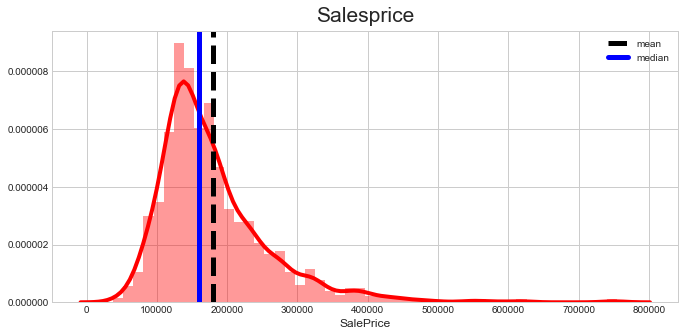

In [19]:
#Distribution of saleprice
fig = plt.figure(figsize=(10,5))


ax = fig.gca()

ax.set_title('Salesprice', fontsize=21, y=1.01)

sns.distplot(house['SalePrice'], bins=50, color='red', ax=ax)

mean=ax.axvline(house['SalePrice'].mean(), color='black', linestyle='--', lw=5)
median=ax.axvline(house['SalePrice'].median(), color='blue', linestyle='-', lw=5)

plt.legend(['mean', 'median'])


print 'The mean for Sale Price is', house['SalePrice'].mean()
print 'The median for Sale Price is', house['SalePrice'].median()

      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
11            60       RL         85.0    11924   Pave   NaN      IR1   
53            20       RL         68.0    50271   Pave   NaN      IR1   
58            60       RL         66.0    13682   Pave   NaN      IR2   
112           60       RL         77.0     9965   Pave   NaN      Reg   
151           20       RL        107.0    13891   Pave   NaN      Reg   
161           60       RL        110.0    13688   Pave   NaN      IR1   
178           20       RL         63.0    17423   Pave   NaN      IR1   
185           75       RM         90.0    22950   Pave   NaN      IR2   
224           20       RL        103.0    13472   Pave   NaN      Reg   
231           60       RL        174.0    15138   Pave   NaN      IR1   
278           20       RL        107.0    14450   Pave   NaN      Reg   
309           20       RL         90.0    12378   Pave   NaN      IR1   
313           20       RL        150.0   215245   P

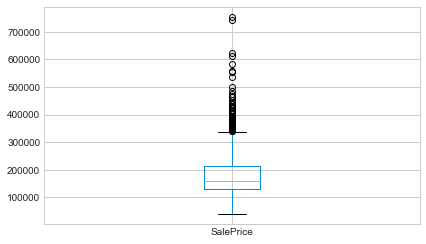

In [20]:
#Outlier is numerically defined by Q3 + 1.5*IQR or Q1 - 1.5*IQR
Q1 = house['SalePrice'].quantile(0.25)
Q3 = house['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

#plot the plot chart and outlier
house['SalePrice'].plot(kind='box')

# print out all the list of outlier
print house[house['SalePrice'] >= Q3+1.5*IQR]
print house[house['SalePrice'] <= Q1-1.5*IQR]


In [21]:
#Find all the columns with missing values
house.isnull().sum()[house.isnull().sum()>0]

LotFrontage      251
Alley           1320
MasVnrType         5
MasVnrArea         5
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      641
GarageType        79
GarageYrBlt       79
GarageFinish      79
GarageQual        79
GarageCond        79
PoolQC          1378
Fence           1108
MiscFeature     1333
dtype: int64

## Treatment for outliers

**Due to there are a number of outliers, I consider the outliers are relevent to the analysis, hence I do not remove the outliers.**

In [22]:
#Use the value_counts() to look for the types and unique values of the columns then find the best way to treat the missing values

# As per data description, NA means "no alley access"
house.loc[house[house["Alley"].isnull()].index, "Alley"] = 'NA'


# As per data description, NA means "no alley access" "no basement"
house.loc[house[house["BsmtQual"].isnull()].index, "BsmtQual"] = 'NA'

house.loc[house[house["BsmtCond"].isnull()].index, "BsmtCond"] = 'NA'
house.loc[house[house["BsmtExposure"].isnull()].index, "BsmtExposure"] = 'NA'
house.loc[house[house["BsmtFinType1"].isnull()].index, "BsmtFinType1"] = 'NA'
house.loc[house[house["BsmtFinType2"].isnull()].index, "BsmtFinType2"] = 'NA'


# As per data description, NA means "no fence"
house.loc[house[house["Fence"].isnull()].index, "Fence"] = 'NA'

# As per data description, NA means "no fireplace"
house.loc[house[house["FireplaceQu"].isnull()].index, "FireplaceQu"] = 'NA'

# As per data description, NA means "no garage"
house.loc[house[house["GarageType"].isnull()].index, "GarageType"] = 'NA'
house.loc[house[house["GarageFinish"].isnull()].index, "GarageFinish"] = 'NA'
house.loc[house[house["GarageQual"].isnull()].index, "GarageQual"] = 'NA'
house.loc[house[house["GarageCond"].isnull()].index, "GarageCond"] = 'NA'

#If no garage= hence the Year of built also not avaliable
house.loc[house[house["GarageYrBlt"].isnull()].index, "GarageYrBlt"] = 0
house.loc[:, "GarageYrBlt"] = house.loc[:, "GarageYrBlt"].map(lambda x : int (x))

# Treat the missing values as no frontage, hence, the missing values converted to 0 instead. 
house.loc[house[house["LotFrontage"].isnull()].index, "LotFrontage"] = 0.0
house.loc[:, "LotFrontage"] = house.loc[:, "LotFrontage"].map(lambda x : float (x))

# As per data description, NA means "no veneer" hence the square feet for Masonry Veneer area also 0
house.loc[house[house["MasVnrType"].isnull()].index, "MasVnrType"] = None
house.loc[house[house["MasVnrArea"].isnull()].index, "MasVnrArea"] = 0.0
house.loc[:, "MasVnrArea"] = house.loc[:, "MasVnrArea"].map(lambda x : float (x))

# As per data description, NA means "no misc feature"
house.loc[house[house["MiscFeature"].isnull()].index, "MiscFeature"] = 'NA'

# As per data description, NA means "no pool"
house.loc[house[house["PoolQC"].isnull()].index, "PoolQC"] = 'NA'


# Treat the missing value as standard, as auditor always said, immaterial (1 error over 1460 sample)
house.loc[house[house["Electrical"].isnull()].index, "Electrical"] = 'SBrkr'

In [23]:
# use dtypes to check the data types of the columns
house['CentralAir'].dtype

dtype('O')

In [24]:
# counts of unique values of the columns and agreed with data description
house['CentralAir'].value_counts()

Y    1296
N      89
Name: CentralAir, dtype: int64

In [25]:
# In my opinions, I defined the those features with scalar level as renovable/ non-fixed feature
# For the non-fixed feature, I will use the dictionary for the replacement the qualitive scalar to quantitative scalar
house = house.replace({"ExterQual" : {"NA" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtQual" : {"NA" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtCond" : {"NA" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"NA" : 0, "No" : 1, "Mn" : 2, "Av" : 3, "Gd" : 4},
                       "BsmtFinType1" : {"NA" : 0, "Unf" : 1, "LwQ" : 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"NA" : 0, "Unf" : 1, "LwQ" : 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "CentralAir" : {"N" : 0, "Y" : 1},
                       "KitchenQual" : {"NA" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "FireplaceQu" : {"NA" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},    
                       "GarageFinish" : {"NA" : 0, "Unf" : 1, "RFn" : 2, "Fin" : 3},
                       "GarageQual" : {"NA" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageCond" : {"NA" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"NA" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Fence" : {"NA" : 0, "MnWw" : 1, "GdWo" : 2, "MnPrv" : 3, "GdPrv" : 4}}
                     )


In [26]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1385 entries, 0 to 1459
Data columns (total 76 columns):
MSSubClass                         1385 non-null int64
MSZoning                           1385 non-null object
LotFrontage                        1385 non-null float64
LotArea                            1385 non-null int64
Street                             1385 non-null object
Alley                              1385 non-null object
LotShape                           1385 non-null object
LandContour                        1385 non-null object
Utilities                          1385 non-null object
LotConfig                          1385 non-null object
LandSlope                          1385 non-null object
Neighborhood                       1385 non-null object
Condition1                         1385 non-null object
Condition2                         1385 non-null object
BldgType                           1385 non-null object
HouseStyle                         1385 non-null objec

In [27]:
house_num = house.select_dtypes(include=np.number)
house_obj = house.select_dtypes('O')

In [28]:
dummies = pd.get_dummies(house_obj)

In [29]:
house_final = house_num.merge(dummies, left_index = True, right_index = True,how = 'outer')#merge back

In [30]:
#See the shape and data types of the final dataset
print 'Number of rows:', house_final.shape[0]
print 'Number of columns:', house.shape[1]
print '------------------------------------\n'

print "Data Types"
print house_final.dtypes

Number of rows: 1385
Number of columns: 76
------------------------------------

Data Types
MSSubClass                 int64
LotFrontage              float64
LotArea                    int64
OverallQual                int64
OverallCond                int64
YearBuilt                  int64
YearRemodAdd               int64
MasVnrArea               float64
ExterQual                  int64
ExterCond                  int64
BsmtQual                   int64
BsmtCond                   int64
BsmtExposure               int64
BsmtFinType1               int64
BsmtFinSF1                 int64
BsmtFinType2               int64
BsmtFinSF2                 int64
BsmtUnfSF                  int64
HeatingQC                  int64
CentralAir                 int64
1stFlrSF                   int64
2ndFlrSF                   int64
LowQualFinSF               int64
GrLivArea                  int64
KitchenAbvGr               int64
KitchenQual                int64
TotRmsAbvGrd               int64
Fireplaces       

In [31]:
#Due to there are too many features, I combine some of the features

# Overall quality of the house
house_final["OverallGrade"] = house_final["OverallQual"] + house_final["OverallCond"]
# Overall quality of the garage
house_final["GarageGrade"] = house_final["GarageQual"] + house_final["GarageCond"]
# Overall quality of the exterior
house_final["ExterGrade"] = house_final["ExterQual"] + house_final["ExterCond"]
# Overall kitchen score
house_final["KitchenScore"] = house_final["KitchenAbvGr"] * house_final["KitchenQual"]
# Overall fireplace score
house_final["FireplaceScore"] = house_final["Fireplaces"] * house_final["FireplaceQu"]
# Overall garage score
house_final["GarageScore"] = house_final["GarageArea"] * house_final["GarageQual"]
# Overall pool score
house_final["PoolScore"] = house_final["PoolArea"] * house_final["PoolQC"]
# Total SF for 1st + 2nd floors
house_final["AllFlrsSF"] = house_final["1stFlrSF"] + house_final["2ndFlrSF"]
# Total SF for porch
house_final["AllPorchSF"] = house_final["OpenPorchSF"] + house_final["EnclosedPorch"] +house_final["3SsnPorch"] + house_final["ScreenPorch"]


In [32]:
non_fixed_features= house_final[["OverallGrade", "GarageGrade", "ExterGrade", "KitchenScore", "GarageScore", 
                       "PoolScore", "AllFlrsSF", "AllPorchSF", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "HeatingQC", "CentralAir", 
                       "GarageFinish", "PavedDrive", "Fence"]]
non_fixed_features.columns

Index([u'OverallGrade', u'GarageGrade', u'ExterGrade', u'KitchenScore',
       u'GarageScore', u'PoolScore', u'AllFlrsSF', u'AllPorchSF', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinType2',
       u'HeatingQC', u'CentralAir', u'GarageFinish', u'PavedDrive', u'Fence'],
      dtype='object')

In [33]:
fixed_features=house_final.drop(non_fixed_features, axis=1)
fixed_features.columns

Index([u'MSSubClass', u'LotFrontage', u'LotArea', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'MasVnrArea',
       u'ExterQual', u'ExterCond',
       ...
       u'SaleType_New', u'SaleType_Oth', u'SaleType_WD',
       u'SaleCondition_Abnorml', u'SaleCondition_AdjLand',
       u'SaleCondition_Alloca', u'SaleCondition_Family',
       u'SaleCondition_Normal', u'SaleCondition_Partial', u'FireplaceScore'],
      dtype='object', length=222)

In [34]:
#Remove all the columns that have been combined
house_final.drop('OverallQual', inplace=True, axis=1)
house_final.drop('OverallCond', inplace=True, axis=1)
house_final.drop('GarageQual', inplace=True, axis=1)
house_final.drop('GarageCond', inplace=True, axis=1)
house_final.drop('ExterQual', inplace=True, axis=1)
house_final.drop('ExterCond', inplace=True, axis=1)
house_final.drop('KitchenAbvGr', inplace=True, axis=1)
house_final.drop('KitchenQual', inplace=True, axis=1)
house_final.drop('Fireplaces', inplace=True, axis=1)
house_final.drop('FireplaceQu', inplace=True, axis=1)
house_final.drop('GarageArea', inplace=True, axis=1)
house_final.drop('PoolArea', inplace=True, axis=1)
house_final.drop('PoolQC', inplace=True, axis=1)
house_final.drop('1stFlrSF', inplace=True, axis=1)
house_final.drop('2ndFlrSF', inplace=True, axis=1)
house_final.drop('OpenPorchSF', inplace=True, axis=1)
house_final.drop('EnclosedPorch', inplace=True, axis=1)
house_final.drop('3SsnPorch', inplace=True, axis=1)
house_final.drop('ScreenPorch', inplace=True, axis=1)

In [157]:
#get the shape after EDA
house_final.columns

Index([u'MSSubClass', u'LotFrontage', u'LotArea', u'YearBuilt',
       u'YearRemodAdd', u'MasVnrArea', u'BsmtQual', u'BsmtCond',
       u'BsmtExposure', u'BsmtFinType1',
       ...
       u'SaleCondition_Partial', u'OverallGrade', u'GarageGrade',
       u'ExterGrade', u'KitchenScore', u'FireplaceScore', u'GarageScore',
       u'PoolScore', u'AllFlrsSF', u'AllPorchSF'],
      dtype='object', length=221)

In [36]:
# the value could not be negative, hence, if the value < 0, assign 0 to it

for i in fixed_features.columns.values:
    if i < 0:
        i = 0

# Modeling

In [37]:
# Define the independent variables X and dependendt variables y
cols = list(fixed_features.columns)
cols.remove('SalePrice')

X = fixed_features[cols]
y = fixed_features.SalePrice.values

### Sales price

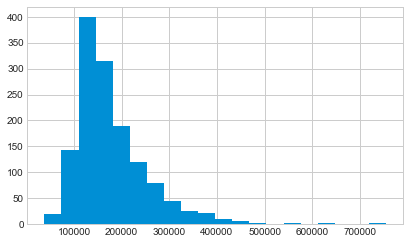

In [38]:
fixed_features.SalePrice.hist(bins=20)

In [39]:
X_train= X[X['YrSold']<2010]
y_train= fixed_features.loc[fixed_features[fixed_features['YrSold']<2010].index, 'SalePrice']
X_test= X[X['YrSold']==2010]
y_test= fixed_features.loc[fixed_features[fixed_features['YrSold']==2010].index, 'SalePrice']

In [40]:
from sklearn.preprocessing import StandardScaler

#Standardize the predictor matrix
ss =StandardScaler()

Xs_train =pd.DataFrame(ss.fit_transform(X_train), columns=X.columns)
Xs_test =pd.DataFrame(ss.fit_transform(X_test), columns=X.columns)

In [41]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegressionCV, LassoCV, Lasso, LinearRegression, RidgeCV, Ridge, ElasticNetCV, ElasticNet, BayesianRidge, OrthogonalMatchingPursuit
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBRegressor
from sklearn.grid_search import GridSearchCV
import sklearn.linear_model as linear_model
import seaborn as sns
import statsmodels.api as sm
import sklearn.metrics as metrics
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [42]:
def find_best_k_cls(Xs_train, y_train, k_min=1, k_max=20, step=2, cv=5):
    k_range = range(k_min, k_max+1, step)
    accs = []
    for k in k_range:
        knn = KNeighborsRegressor(n_neighbors=k)
        scores = cross_val_score(knn, Xs_train, y_train, cv=cv)
        accs.append(np.mean(scores))
    print np.max(accs), np.argmax(k_range)
    return np.argmax(k_range)
find_best_k_cls(Xs_train, y_train)

0.7231279996300819 9


9

**K9 have the highest score, hence we use 9 folds for the train_test_split**

### Ridge

In [43]:
rr = RidgeCV(alphas=10.**np.linspace(-10, 5, 10), fit_intercept=True)

rr.fit(Xs_train, y_train)

print "Ridge Regression- Test R2 score:", rr.score(Xs_test, y_test)

Ridge Regression- Test R2 score: 0.8989970609398972


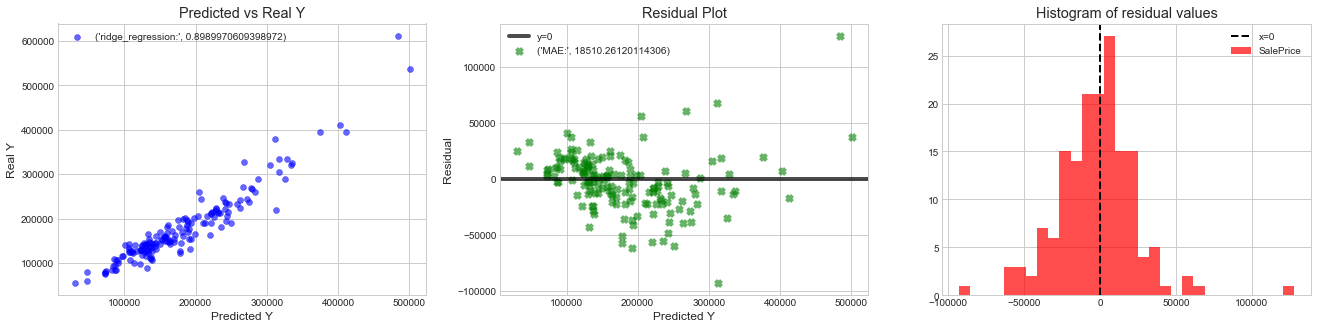

In [44]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Get the current axis out of the figure.
ax = fig.gca()
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]


# Predicted vs Real y
ax1.scatter(rr.predict(Xs_test), y_test, color='blue', alpha=0.6, label=("ridge_regression:", rr.score(Xs_test, y_test)))
ax1.set_xlabel('Predicted Y')
ax1.set_ylabel('Real Y')
ax1.legend(loc='best')
ax1.set_title('Predicted vs Real Y')

ax2.scatter(rr.predict(Xs_test), y_test-rr.predict(Xs_test), color='green', marker='x', alpha=0.6, label=("MAE:", mean_absolute_error(y_test, rr.predict(Xs_test))))
ax2.set_xlabel('Predicted Y')
ax2.set_ylabel('Residual')
ax2.axhline(y=0, color='black', alpha=0.7, label='y=0')
ax2.legend(loc='best')
ax2.set_title('Residual Plot')

ax3.hist(y_test - rr.predict(Xs_test), bins=30, color='red', alpha=0.7)
ax3.set_title('Histogram of residual values')
ax3.axvline(x=0, color='black', linestyle='--', lw=2, label='x=0')
ax3.legend(loc='best')

In [45]:
#Cross-validate the linear R2 with the optimal alpha
rr_coefs = pd.DataFrame({'variable':Xs_train.columns,
                            'coef':rr.coef_,
                            'abs_coef':np.abs(rr.coef_)})

rr_coefs.sort_values('abs_coef', inplace=True, ascending=False)

rr_coefs.head(20)

abs_coef          coef                         variable
126  16915.294311 -16915.294311                 RoofMatl_ClyTile
16   14450.269028  14450.269028                        GrLivArea
3    11667.694466  11667.694466                      OverallQual
14   10158.428659  10158.428659                         2ndFlrSF
10    9266.842916   9266.842916                       BsmtFinSF1
13    8704.259252   8704.259252                         1stFlrSF
81    8327.322160   8327.322160             Neighborhood_NridgHt
103   7281.595438  -7281.595438                  Condition2_PosN
38    7261.735149   7261.735149  Total_basement_and_garage_space
5     6702.923200   6702.923200                        YearBuilt
7     6468.735268   6468.735268                       MasVnrArea
87    6206.065716   6206.065716             Neighborhood_StoneBr
133   6179.030108   6179.030108                 RoofMatl_WdShngl
33    5651.054441   5651.054441                           PoolQC
4     5607.420001   5607.420001                      OverallCond
80    5526.363688   5526.363688             Neighborhood_NoRidge
2     5130.305695   5130.305695                          LotArea
18    4745.582730   4745.582730                      KitchenQual
220   4624.739712   4624.739712                   FireplaceScore
23    3905.449139   3905.449139                       GarageCars

### Lasso

In [46]:
#Find the best alpha parameter through cross-validation
optimal_lasso = LassoCV(n_alphas=500, cv=9, verbose=1)
optimal_lasso.fit(Xs_train, y_train)

print optimal_lasso.alpha_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

637.3887923649061


................[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.9s finished


In [47]:
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso.fit(Xs_train, y_train)

print "Lasso Regression- Test R2 score:", lasso.score(Xs_test, y_test)

Lasso Regression- Test R2 score: 0.8984246502131672


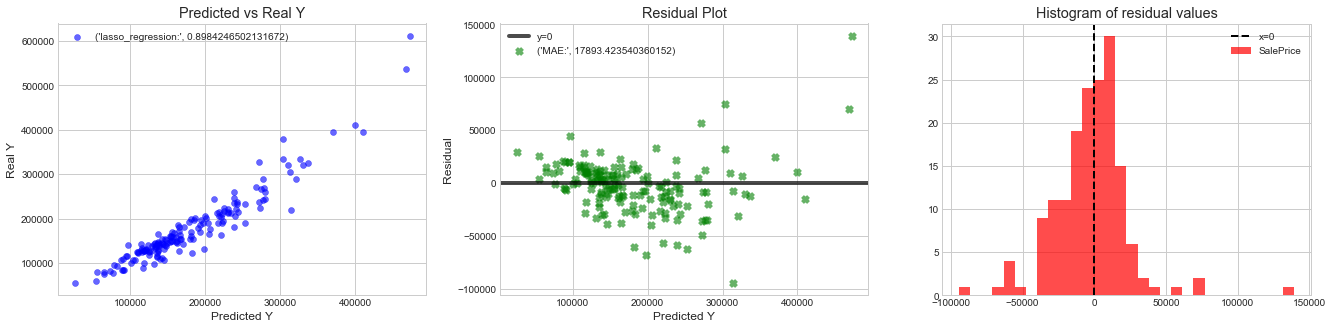

In [48]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Get the current axis out of the figure.
ax = fig.gca()
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]


# Predicted vs Real y
ax1.scatter(lasso.predict(Xs_test), y_test, color='blue', alpha=0.6, label=("lasso_regression:", lasso.score(Xs_test, y_test)))
ax1.set_xlabel('Predicted Y')
ax1.set_ylabel('Real Y')
ax1.legend(loc='best')
ax1.set_title('Predicted vs Real Y')

ax2.scatter(lasso.predict(Xs_test), y_test-lasso.predict(Xs_test), color='green', marker='x', alpha=0.6, label=("MAE:", mean_absolute_error(y_test, lasso.predict(Xs_test))))
ax2.set_xlabel('Predicted Y')
ax2.set_ylabel('Residual')
ax2.axhline(y=0, color='black', alpha=0.7, label='y=0')
ax2.legend(loc='best')
ax2.set_title('Residual Plot')

ax3.hist(y_test - lasso.predict(Xs_test), bins=30, color='red', alpha=0.7)
ax3.set_title('Histogram of residual values')
ax3.axvline(x=0, color='black', linestyle='--', lw=2, label='x=0')
ax3.legend(loc='best')

In [49]:
#Cross-validate the linear R2 with the optimal alpha
lasso_coefs = pd.DataFrame({'variable':Xs_train.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs.head(20)

abs_coef          coef                         variable
16   26454.405527  26454.405527                        GrLivArea
126  17095.484938 -17095.484938                 RoofMatl_ClyTile
3    13294.246366  13294.246366                      OverallQual
10   10552.294732  10552.294732                       BsmtFinSF1
81    8459.884776   8459.884776             Neighborhood_NridgHt
103   7494.415451  -7494.415451                  Condition2_PosN
5     6912.501586   6912.501586                        YearBuilt
211   6316.513580   6316.513580                     SaleType_New
80    5755.118602   5755.118602             Neighborhood_NoRidge
38    5689.185338   5689.185338  Total_basement_and_garage_space
87    5342.760796   5342.760796             Neighborhood_StoneBr
133   5341.031532   5341.031532                 RoofMatl_WdShngl
7     5135.873752   5135.873752                       MasVnrArea
4     4881.413661   4881.413661                      OverallCond
18    4446.822752   4446.822752                      KitchenQual
8     4405.303001   4405.303001                        ExterQual
2     3884.631597   3884.631597                          LotArea
33    3639.614227   3639.614227                           PoolQC
107   3380.175159   3380.175159                    BldgType_1Fam
23    3304.790471   3304.790471                       GarageCars

### Elastic Net

In [50]:
elastic = ElasticNetCV()

elastic.fit(Xs_train, y_train)

print "Elastic Regression- Test R2 score:", elastic.score(Xs_test, y_test)

Elastic Regression- Test R2 score: 0.2386879137772755


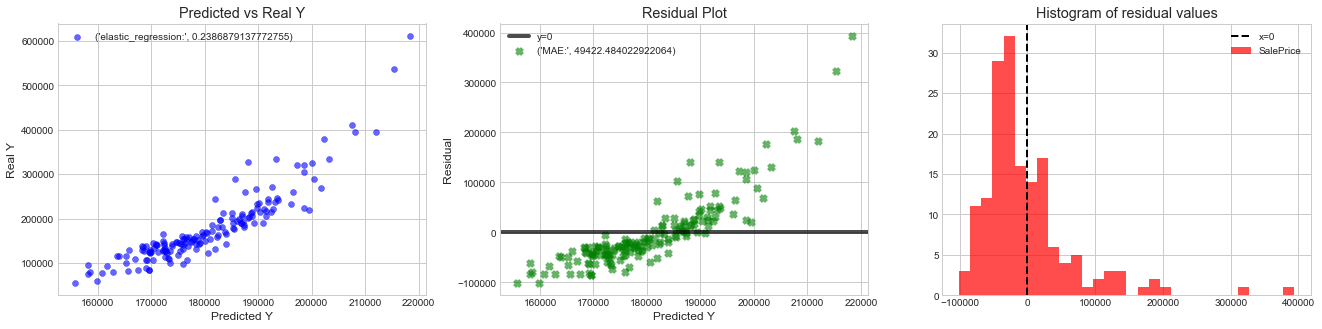

In [51]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Get the current axis out of the figure.
ax = fig.gca()
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]


# Predicted vs Real y
ax1.scatter(elastic.predict(Xs_test), y_test, color='blue', alpha=0.6, label=("elastic_regression:", elastic.score(Xs_test, y_test)))
ax1.set_xlabel('Predicted Y')
ax1.set_ylabel('Real Y')
ax1.legend(loc='best')
ax1.set_title('Predicted vs Real Y')

ax2.scatter(elastic.predict(Xs_test), y_test-elastic.predict(Xs_test), color='green', marker='x', alpha=0.6, label=("MAE:", mean_absolute_error(y_test, elastic.predict(Xs_test))))
ax2.set_xlabel('Predicted Y')
ax2.set_ylabel('Residual')
ax2.axhline(y=0, color='black', alpha=0.7, label='y=0')
ax2.legend(loc='best')
ax2.set_title('Residual Plot')

ax3.hist(y_test - elastic.predict(Xs_test), bins=30, color='red', alpha=0.7)
ax3.set_title('Histogram of residual values')
ax3.axvline(x=0, color='black', linestyle='--', lw=2, label='x=0')
ax3.legend(loc='best')

In [52]:
elastic_coefs = pd.DataFrame({'variable':Xs_train.columns,
                            'coef':elastic.coef_,
                            'abs_coef':np.abs(elastic.coef_)})

elastic_coefs.sort_values('abs_coef', inplace=True, ascending=False)

elastic_coefs.head(20)

abs_coef        coef                         variable
3    841.392487  841.392487                      OverallQual
16   761.982784  761.982784                        GrLivArea
38   728.900063  728.900063  Total_basement_and_garage_space
8    713.497667  713.497667                        ExterQual
18   688.624294  688.624294                      KitchenQual
23   663.930236  663.930236                       GarageCars
24   654.945040  654.945040                       GarageArea
13   649.021933  649.021933                         1stFlrSF
19   569.666674  569.666674                     TotRmsAbvGrd
21   553.582164  553.582164                      FireplaceQu
220  546.665631  546.665631                   FireplaceScore
7    533.423242  533.423242                       MasVnrArea
37   528.680597  528.680597       Total_bathroom_and_bedroom
6    520.565806  520.565806                     YearRemodAdd
5    512.034169  512.034169                        YearBuilt
20   499.951856  499.951856                       Fireplaces
171  490.985745  490.985745                 Foundation_PConc
81   450.139277  450.139277             Neighborhood_NridgHt
10   404.789656  404.789656                       BsmtFinSF1
80   386.643484  386.643484             Neighborhood_NoRidge

### GridSearch and Stochastic Gradient Descent (SGD)

In [53]:
tuned_parameters = {'alpha': np.linspace(0,1,25), 
                   'penalty': ['l1', 'l2'],
                   'loss': ['squared_loss','huber']}

sgd_reg = SGDRegressor()
sgd_reg_gs = GridSearchCV(sgd_reg, tuned_parameters, cv=9, verbose=False)

In [54]:
sgd_reg_gs.fit(Xs_train, y_train)

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


GridSearchCV(cv=9, error_score='raise',
       estimator=SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'alpha': array([0.     , 0.04167, 0.08333, 0.125  , 0.16667, 0.20833, 0.25   ,
       0.29167, 0.33333, 0.375  , 0.41667, 0.45833, 0.5    , 0.54167,
       0.58333, 0.625  , 0.66667, 0.70833, 0.75   , 0.79167, 0.83333,
       0.875  , 0.91667, 0.95833, 1.     ]), 'loss': ['squared_loss', 'huber']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=False)

In [55]:
print sgd_reg_gs.best_params_
print sgd_reg_gs.best_score_
sgd_reg = sgd_reg_gs.best_estimator_

{'penalty': 'l2', 'alpha': 0.9166666666666666, 'loss': 'squared_loss'}
0.819249851988


In [56]:
sgd_reg

SGDRegressor(alpha=0.9166666666666666, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [57]:
print "SGD Regression- Test R2 score:", sgd_reg_gs.score(Xs_test, y_test)

SGD Regression- Test R2 score: 0.8833403708947866


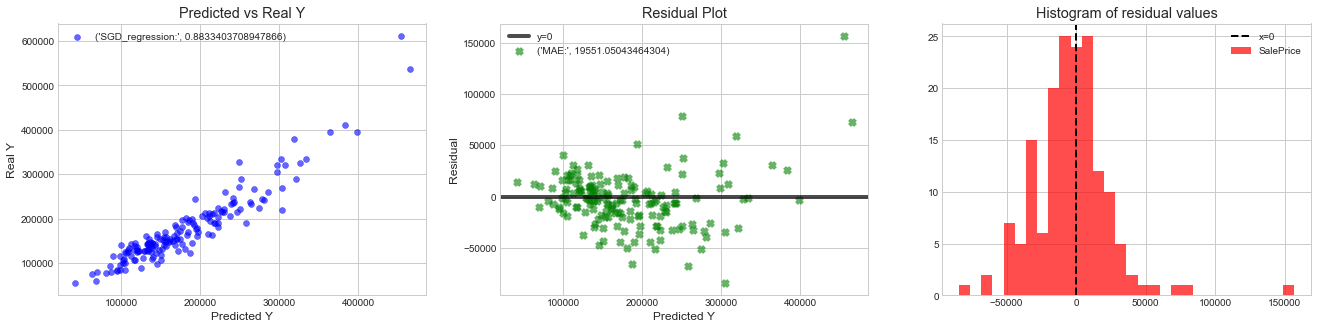

In [58]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Get the current axis out of the figure.
ax = fig.gca()
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]

# Predicted vs Real y
ax1.scatter(sgd_reg_gs.predict(Xs_test), y_test, color='blue', alpha=0.6, label=("SGD_regression:", sgd_reg_gs.score(Xs_test, y_test)))
ax1.set_xlabel('Predicted Y')
ax1.set_ylabel('Real Y')
ax1.legend(loc='best')
ax1.set_title('Predicted vs Real Y')

ax2.scatter(sgd_reg_gs.predict(Xs_test), y_test-sgd_reg_gs.predict(Xs_test), color='green', marker='x', alpha=0.6, label=("MAE:", mean_absolute_error(y_test, sgd_reg_gs.predict(Xs_test))))
ax2.set_xlabel('Predicted Y')
ax2.set_ylabel('Residual')
ax2.axhline(y=0, color='black', alpha=0.7, label='y=0')
ax2.legend(loc='best')
ax2.set_title('Residual Plot')

ax3.hist(y_test - sgd_reg_gs.predict(Xs_test), bins=30, color='red', alpha=0.7)
ax3.set_title('Histogram of residual values')
ax3.axvline(x=0, color='black', linestyle='--', lw=2, label='x=0')
ax3.legend(loc='best')

In [59]:
value_coefs = pd.DataFrame({'coef':sgd_reg.coef_,
                            'abs_coef':np.abs(sgd_reg.coef_),
                            'variable':Xs_train.columns})
value_coefs.sort_values('abs_coef', ascending=False, inplace=True)
value_coefs.head(20)

abs_coef         coef                         variable
16   8149.627568  8149.627568                        GrLivArea
3    8002.612212  8002.612212                      OverallQual
13   6603.522654  6603.522654                         1stFlrSF
80   5951.364165  5951.364165             Neighborhood_NoRidge
38   5929.230133  5929.230133  Total_basement_and_garage_space
133  5677.671053  5677.671053                 RoofMatl_WdShngl
10   5575.889884  5575.889884                       BsmtFinSF1
8    5531.923198  5531.923198                        ExterQual
18   5363.016378  5363.016378                      KitchenQual
7    4961.728840  4961.728840                       MasVnrArea
81   4681.200452  4681.200452             Neighborhood_NridgHt
19   4420.126625  4420.126625                     TotRmsAbvGrd
33   4243.025185  4243.025185                           PoolQC
24   4102.329525  4102.329525                       GarageArea
14   4024.510507  4024.510507                         2ndFlrSF
126  3628.528992 -3628.528992                 RoofMatl_ClyTile
23   3563.367059  3563.367059                       GarageCars
220  3306.452787  3306.452787                   FireplaceScore
2    3280.178399  3280.178399                          LotArea
87   3029.800514  3029.800514             Neighborhood_StoneBr

### Random Search and Random Forest

In [60]:
#use a randomized search due to large number of parameters
from sklearn.model_selection import RandomizedSearchCV
random_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10]
}

In [61]:
rf = RandomForestRegressor()
# Random search of parameters, using 9 fold cross validation, 
# search across 1800 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 200, cv = 9, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(Xs_train, y_train)
print rf_random.best_score_
print rf_random.best_params_

Fitting 9 folds for each of 200 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 1370 tasks      | elapsed:   40.9s
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:   50.9s finished


0.8533016989962575
{'min_samples_split': 2, 'max_features': 'auto', 'bootstrap': True, 'max_depth': 60, 'min_samples_leaf': 1}


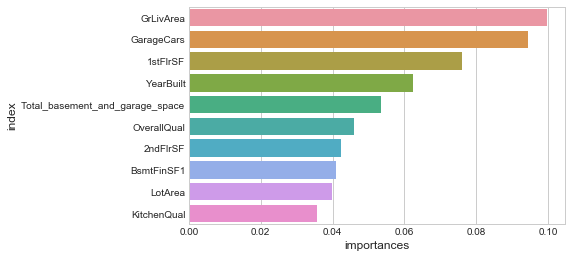

In [62]:
rf2 = RandomForestRegressor(min_samples_split= 2,
                             max_features= 'sqrt',
                             bootstrap= False,
                             max_depth= 60,
                             min_samples_leaf= 1)
rf2.fit(Xs_train, y_train)
importances = rf2.feature_importances_
std = np.std([rf2.feature_importances_ for tree in rf2.estimators_],
             axis=0)
fea_imp = pd.DataFrame(zip(importances,std), Xs_train.columns.values, columns = ['importances', 'std'])
fea_imp = fea_imp.sort_values('importances', ascending=False).reset_index()
sns.barplot('importances', 'index', data=fea_imp[:10])

In [63]:
print "Random Forest Regression- Test R2 score:", rf2.score(Xs_test, y_test)

Random Forest Regression- Test R2 score: 0.8779146565318419


In [64]:
fea_imp.head(10)

index  importances           std
0                        GrLivArea     0.099581  0.000000e+00
1                       GarageCars     0.094432  0.000000e+00
2                         1stFlrSF     0.075871  0.000000e+00
3                        YearBuilt     0.062416  1.387779e-17
4  Total_basement_and_garage_space     0.053421  0.000000e+00
5                      OverallQual     0.045879  6.938894e-18
6                         2ndFlrSF     0.042430  6.938894e-18
7                       BsmtFinSF1     0.040907  0.000000e+00
8                          LotArea     0.039965  6.938894e-18
9                      KitchenQual     0.035648  6.938894e-18

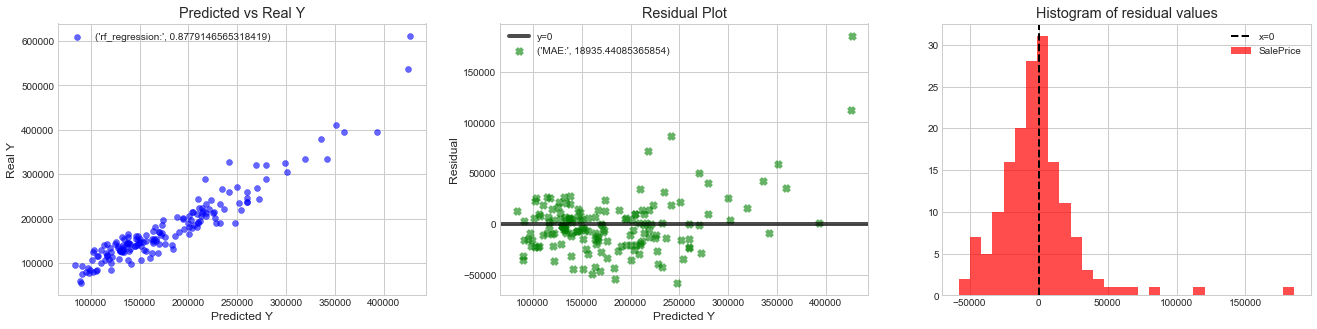

In [65]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Get the current axis out of the figure.
ax = fig.gca()
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]

# Predicted vs Real y
ax1.scatter(rf2.predict(Xs_test), y_test, color='blue', alpha=0.6, label=("rf_regression:", rf2.score(Xs_test, y_test)))
ax1.set_xlabel('Predicted Y')
ax1.set_ylabel('Real Y')
ax1.legend(loc='best')
ax1.set_title('Predicted vs Real Y')

ax2.scatter(rf2.predict(Xs_test), y_test-rf2.predict(Xs_test), color='green', marker='x', alpha=0.6, label=("MAE:", mean_absolute_error(y_test, rf2.predict(Xs_test))))
ax2.set_xlabel('Predicted Y')
ax2.set_ylabel('Residual')
ax2.axhline(y=0, color='black', alpha=0.7, label='y=0')
ax2.legend(loc='best')
ax2.set_title('Residual Plot')

ax3.hist(y_test - rf2.predict(Xs_test), bins=30, color='red', alpha=0.7)
ax3.set_title('Histogram of residual values')
ax3.axvline(x=0, color='black', linestyle='--', lw=2, label='x=0')
ax3.legend(loc='best')

### Grid Search and XGBoost

In [66]:
xgb = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb,
                        parameters,
                        cv = 9,
                        n_jobs = -1,
                        verbose=True)

xgb_grid.fit(Xs_train,
         y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 9 folds for each of 9 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   34.8s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  1.3min finished


0.885726553303
{'colsample_bytree': 0.7, 'silent': 1, 'learning_rate': 0.05, 'nthread': 4, 'min_child_weight': 4, 'n_estimators': 500, 'subsample': 0.7, 'objective': 'reg:linear', 'max_depth': 5}


In [67]:
xgb = XGBRegressor(colsample_bytree = 0.7, silent = 1, learning_rate = 0.05, nthread = 4, min_child_weight = 4, n_estimators = 500, subsample = 0.7, objective = 'reg:linear', max_depth = 5)

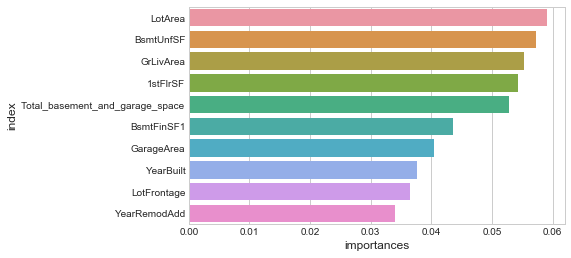

In [68]:
folds = 9
param_comb = 5
# skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 2)
# random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=-1, cv=skf.split(Xs_train, y_train), verbose=3, random_state=99 )
# # Here we go
xgb.fit(Xs_train, y_train)

importances = xgb.feature_importances_
fea_imp_1 = pd.DataFrame(importances, Xs_train.columns.values, columns = ['importances'])
fea_imp_1 = fea_imp_1.sort_values('importances', ascending=False).reset_index()
sns.barplot('importances', 'index', data=fea_imp_1[:10])

In [69]:
fea_imp_1.head(10)

index  importances
0                          LotArea     0.059030
1                        BsmtUnfSF     0.057333
2                        GrLivArea     0.055273
3                         1stFlrSF     0.054303
4  Total_basement_and_garage_space     0.052848
5                       BsmtFinSF1     0.043636
6                       GarageArea     0.040364
7                        YearBuilt     0.037697
8                      LotFrontage     0.036485
9                     YearRemodAdd     0.034061

In [70]:
print "XGB Regression- Test R2 score:", xgb.score(Xs_test, y_test)

XGB Regression- Test R2 score: 0.9313902771811524


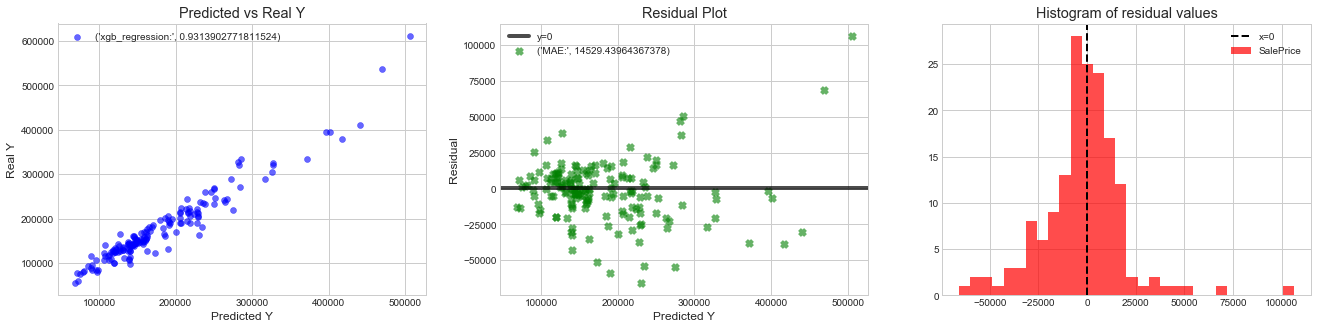

In [71]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Get the current axis out of the figure.
ax = fig.gca()
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]

# Predicted vs Real y
ax1.scatter(xgb.predict(Xs_test), y_test, color='blue', alpha=0.6, label=("xgb_regression:", xgb.score(Xs_test, y_test)))
ax1.set_xlabel('Predicted Y')
ax1.set_ylabel('Real Y')
ax1.legend(loc='best')
ax1.set_title('Predicted vs Real Y')

ax2.scatter(xgb.predict(Xs_test), y_test-xgb.predict(Xs_test), color='green', marker='x', alpha=0.6, label=("MAE:", mean_absolute_error(y_test, xgb.predict(Xs_test))))
ax2.set_xlabel('Predicted Y')
ax2.set_ylabel('Residual')
ax2.axhline(y=0, color='black', alpha=0.7, label='y=0')
ax2.legend(loc='best')
ax2.set_title('Residual Plot')

ax3.hist(y_test - xgb.predict(Xs_test), bins=30, color='red', alpha=0.7)
ax3.set_title('Histogram of residual values')
ax3.axvline(x=0, color='black', linestyle='--', lw=2, label='x=0')
ax3.legend(loc='best')

### All score

In [72]:
rr_columns = rr_coefs.variable.values
lasso_columns = lasso_coefs.variable.values
elastic_columns = elastic_coefs.variable.values
sgd_reg_columns = value_coefs.variable.values
rf_random_columns = fea_imp['index'].values
xgb_columns = fea_imp_1['index'].values

In [73]:
# Defining functions to test our best features head to head.

def score_ridge(Xs_test):
    scores_ridge = cross_val_score(rr, Xs_test, y_test, cv=9)
    return scores_ridge.mean(), scores_ridge.std()

def score_lasso(Xs_test):
    scores_lasso = cross_val_score(lasso, Xs_test, y_test, cv=9)
    return scores_lasso.mean(), scores_lasso.std()

def score_elastic(Xs_test):
    scores_elastic = cross_val_score(elastic, Xs_test, y_test, cv=9)
    return scores_elastic.mean(), scores_elastic.std()

def score_sgd(Xs_test):
    scores_sgd = cross_val_score(sgd_reg, Xs_test, y_test, cv=9)
    return scores_sgd.mean(), scores_sgd.std()

def score_rf_random(Xs_test):
    scores_rf_random = cross_val_score(rf2, Xs_test, y_test, cv=9)
    return scores_rf_random.mean(), scores_rf_random.std()

def score_xgb(Xs_test):
    scores_xgb = cross_val_score(xgb, Xs_test, y_test, cv=9)
    return scores_xgb.mean(), scores_xgb.std()


all_scores_test = [
    score_ridge(Xs_test[rr_columns]),
    score_lasso(Xs_test[lasso_columns]),
    score_elastic(Xs_test[elastic_columns]),
    score_sgd(Xs_test[sgd_reg_columns]),
    score_rf_random(Xs_test[rf_random_columns]),
    score_xgb(Xs_test[xgb_columns]),
    ]

# Putting results into a DataFrame.
all_scores = pd.DataFrame(all_scores_test, columns=['test mean score', 'test std score'], index = ['ridge_model', 'lasso_model', 'elastic_model', 'sgd_model', 'rf_model', 'xgb_model'])

In [74]:
all_scores

test mean score  test std score
ridge_model           0.831610        0.118449
lasso_model           0.837251        0.125298
elastic_model         0.215472        0.058412
sgd_model             0.000638        0.580449
rf_model              0.781973        0.096483
xgb_model             0.851425        0.056048

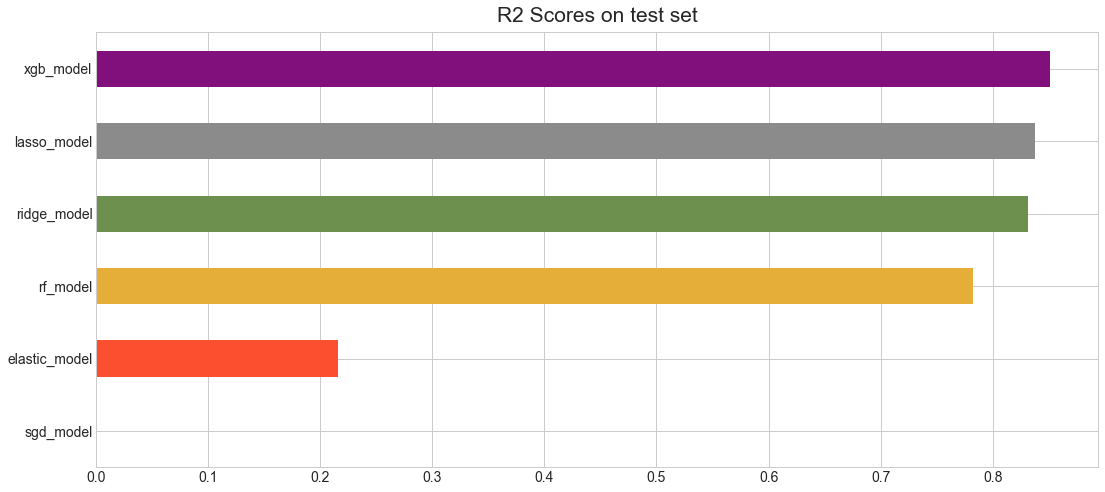

In [75]:
# set the title
plt.title('R2 Scores on test set', fontsize=21, y=1.01)

ax = all_scores['test mean score'].sort_values(ascending=True).plot(kind='barh', 
            figsize=(16,8), 
            fontsize=14)

In [76]:
xgb_grid.predict(Xs_test)

array([149097.55 , 146590.62 , 130819.016, 326295.88 , 184802.86 ,
       139039.58 , 282703.06 , 114994.44 , 143937.5  , 233866.86 ,
        78498.484, 148413.8  , 112450.7  , 130851.3  ,  80756.34 ,
       118529.76 , 218134.38 , 183056.64 , 194876.69 , 205579.88 ,
       169410.62 , 327546.03 ,  89864.28 , 127585.8  , 228359.52 ,
       249693.27 , 274497.47 , 205505.28 , 144187.1  , 169804.03 ,
       145764.53 , 120633.6  , 138228.81 , 131427.97 , 218511.9  ,
       191102.56 , 214660.73 , 140646.56 , 229698.25 ,  70662.98 ,
       145335.33 , 122242.39 , 316557.6  , 206043.34 , 107178.97 ,
       117779.85 , 262783.6  , 228560.9  ,  90424.11 , 106489.484,
       139217.25 , 162524.2  , 120049.56 , 396549.94 , 162081.12 ,
       191380.22 , 131730.14 , 107777.03 , 137952.92 , 218955.55 ,
       229346.72 , 272545.75 ,  96339.51 , 283828.06 , 172509.28 ,
       118138.53 , 215605.92 ,  74297.82 , 141268.36 , 144009.36 ,
       161347.47 , 138356.89 , 156659.88 ,  89205.23 , 140613.

Test set


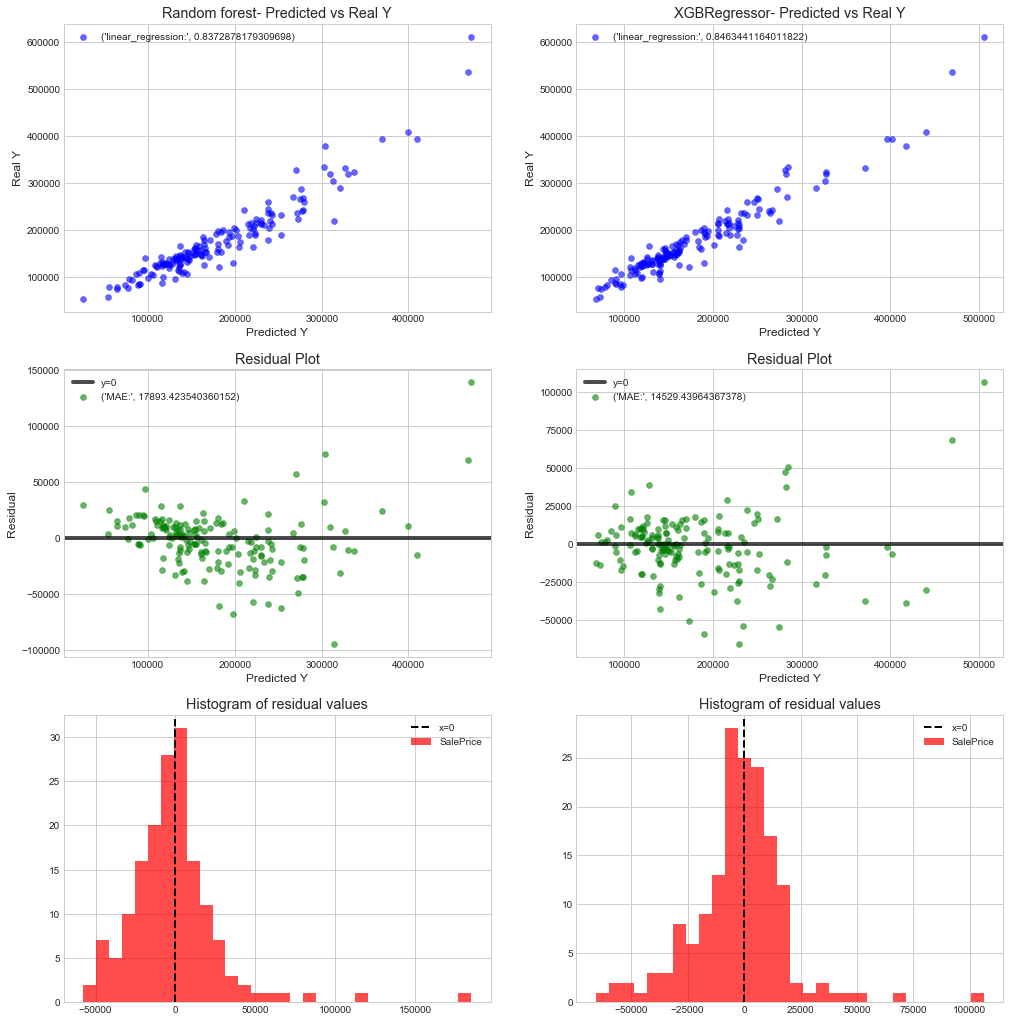

In [77]:
print 'Test set'
fig, axes = plt.subplots(3, 2, figsize=(15, 18))

# Get the current axis out of the figure.
ax = fig.gca()
ax1 = axes[0][0]
ax2 = axes[0][1]
ax3 = axes[1][0]
ax4 = axes[1][1]
ax5 = axes[2][0]
ax6 = axes[2][1]

ax1.scatter(lasso.predict(Xs_test), y_test, color='blue', alpha=0.6, label=("linear_regression:", np.mean(cross_val_score(lasso, Xs_test, y_test, cv=9))))
ax1.set_xlabel('Predicted Y')
ax1.set_ylabel('Real Y')
ax1.legend(loc='best')
ax1.set_title('Random forest- Predicted vs Real Y')

ax2.scatter(xgb_grid.predict(Xs_test), y_test, color='blue', alpha=0.6, label=("linear_regression:", np.mean(cross_val_score(xgb, Xs_test, y_test, cv=9))))
ax2.set_xlabel('Predicted Y')
ax2.set_ylabel('Real Y')
ax2.legend(loc='best')
ax2.set_title('XGBRegressor- Predicted vs Real Y')

ax3.scatter(lasso.predict(Xs_test), y_test-lasso.predict(Xs_test), color='green', alpha=0.6, label=("MAE:", mean_absolute_error(y_test, lasso.predict(Xs_test))))
ax3.set_xlabel('Predicted Y')
ax3.set_ylabel('Residual')
ax3.axhline(y=0, color='black', alpha=0.7, label='y=0')
ax3.legend(loc='best')
ax3.set_title('Residual Plot')

ax4.scatter(xgb_grid.predict(Xs_test), y_test-xgb_grid.predict(Xs_test), color='green', alpha=0.6, label=("MAE:", mean_absolute_error(y_test, xgb.predict(Xs_test))))
ax3.set_xlabel('Predicted Y')
ax4.set_xlabel('Predicted Y')
ax4.set_ylabel('Residual')
ax4.axhline(y=0, color='black', alpha=0.7, label='y=0')
ax4.legend(loc='best')
ax4.set_title('Residual Plot')

ax5.hist(y_test - rf2.predict(Xs_test), bins=30, color='red', alpha=0.7)
ax5.set_title('Histogram of residual values')
ax5.axvline(x=0, color='black', linestyle='--', lw=2, label='x=0')
ax5.legend(loc='best')

ax6.hist(y_test - xgb_grid.predict(Xs_test), bins=30, color='red', alpha=0.7)
ax6.set_title('Histogram of residual values')
ax6.axvline(x=0, color='black', linestyle='--', lw=2, label='x=0')
ax6.legend(loc='best')

The XGBoost regressor have the best performance as the XGBoost regressor have the smallest residual error.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Now that you have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 and 3 of the plan: what are the costs/benefits of quality, condition, and renovations?

There are two specific requirements for these estimates:
1. The estimates of effects must be in terms of dollars added or subtracted from the house value. 
2. The effects must be on the variance in price remaining from the first model.

The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?

---

**Your goals:**
1. Evaluate the effect in dollars of the renovate-able features. 
- How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. 
- Investigate how much of the variance in price remaining is explained by these features.
- Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

In [78]:
non_fixed_features.head()

OverallGrade  GarageGrade  ExterGrade  KitchenScore  GarageScore  \
0            12            6           7             4         1644   
1            14            6           6             3         1380   
2            12            6           7             4         1824   
3            12            6           6             4         1926   
4            13            6           7             4         2508   

   PoolScore  AllFlrsSF  AllPorchSF  BsmtQual  BsmtCond  BsmtExposure  \
0          0       1710          61         4         3             1   
1          0       1262           0         4         3             4   
2          0       1786          42         4         3             2   
3          0       1717         307         3         4             1   
4          0       2198          84         4         3             3   

   BsmtFinType1  BsmtFinType2  HeatingQC  CentralAir  GarageFinish  \
0             6             1          5           1             2   
1             5             1          5           1             2   
2             6             1          5           1             2   
3             5             1          4           1             1   
4             6             1          5           1             2   

   PavedDrive  Fence  
0           2      0  
1           2      0  
2           2      0  
3           2      0  
4           2      0

In [79]:
# rfecv model get the best score, we use the rfecv model to predict y_hats

non_fixed_features['y_residual'] = y-xgb.fit(X[xgb_columns], y).predict(X[xgb_columns])
# non_fixed_features['YrSold'] = fixed_features['YrSold']


D:\Users\ivans\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [80]:
# Define the independent variables X and dependendt variables y

non_fixed_features= non_fixed_features.merge(fixed_features[['YrSold']], left_index = True, right_index = True,how = 'outer')
X_nf = non_fixed_features.drop('y_residual', axis=1)
y_nf = non_fixed_features.y_residual.values


In [81]:
X_train_nf= X_nf[X_nf['YrSold']<2010]
y_train_nf= non_fixed_features.loc[non_fixed_features[non_fixed_features['YrSold']<2010].index, 'y_residual']
X_test_nf= X_nf[X_nf['YrSold']==2010]
y_test_nf= non_fixed_features.loc[non_fixed_features[non_fixed_features['YrSold']==2010].index, 'y_residual']

In [82]:
#standardize the X_train and y test
Xs_nf =ss.fit_transform(X_nf)

Xs_train_nf =pd.DataFrame(ss.fit_transform(X_train_nf), columns=X_nf.columns)
Xs_test_nf =pd.DataFrame(ss.fit_transform(X_test_nf), columns=X_nf.columns)

In [83]:
def find_best_k_cls(Xs_train_nf, y_train_nf, k_min=1, k_max=20, step=2, cv=5):
    k_range = range(k_min, k_max+1, step)
    accs = []
    for k in k_range:
        knn = KNeighborsRegressor(n_neighbors=k)
        scores = cross_val_score(knn, Xs_nf, y_nf, cv=cv)
        accs.append(np.mean(scores))
    print np.max(accs), np.argmax(k_range)
    return np.argmax(k_range)
find_best_k_cls(Xs_train, y_train)

-0.07459765138923871 9


9

### 9 folds give the highest score

## Modeling

### Ridge

In [84]:
rr = RidgeCV(alphas=10.**np.linspace(-10, 5, 10), fit_intercept=True)

rr.fit(Xs_train_nf, y_train_nf)

print "Ridge Regression- Test R2 score:", rr.score(Xs_test_nf, y_test_nf)



Ridge Regression- Test R2 score: 6.656787089309724e-05


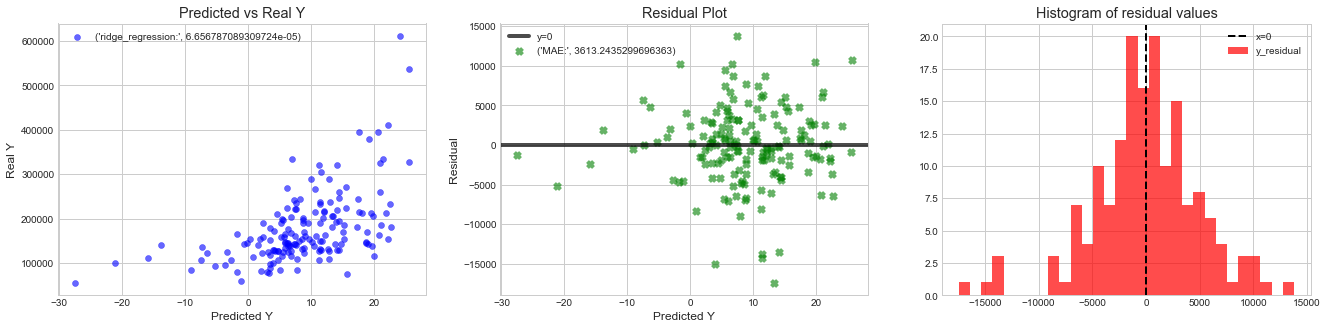

In [85]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Get the current axis out of the figure.
ax = fig.gca()
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]


# Predicted vs Real y
ax1.scatter(rr.predict(Xs_test_nf), y_test, color='blue', alpha=0.6, label=("ridge_regression:", rr.score(Xs_test_nf, y_test_nf)))
ax1.set_xlabel('Predicted Y')
ax1.set_ylabel('Real Y')
ax1.legend(loc='best')
ax1.set_title('Predicted vs Real Y')

ax2.scatter(rr.predict(Xs_test_nf), y_test_nf-rr.predict(Xs_test_nf), color='green', marker='x', alpha=0.6, label=("MAE:", mean_absolute_error(y_test_nf, rr.predict(Xs_test_nf))))
ax2.set_xlabel('Predicted Y')
ax2.set_ylabel('Residual')
ax2.axhline(y=0, color='black', alpha=0.7, label='y=0')
ax2.legend(loc='best')
ax2.set_title('Residual Plot')

ax3.hist(y_test_nf - rr.predict(Xs_test_nf), bins=30, color='red', alpha=0.7)
ax3.set_title('Histogram of residual values')
ax3.axvline(x=0, color='black', linestyle='--', lw=2, label='x=0')
ax3.legend(loc='best')


In [86]:
#Cross-validate the linear R2 with the optimal alpha
rr_coefs = pd.DataFrame({'variable':Xs_train_nf.columns,
                            'coef':rr.coef_,
                            'abs_coef':np.abs(rr.coef_)})

rr_coefs.sort_values('abs_coef', inplace=True, ascending=False)

rr_coefs.head(20)


abs_coef      coef      variable
10  4.474010  4.474010  BsmtExposure
11  2.111869  2.111869  BsmtFinType1
17  1.681600 -1.681600         Fence
13  1.672359  1.672359     HeatingQC
16  1.620721  1.620721    PavedDrive
3   1.495692 -1.495692  KitchenScore
7   1.375834  1.375834    AllPorchSF
9   1.223174  1.223174      BsmtCond
5   1.105492  1.105492     PoolScore
14  1.041627  1.041627    CentralAir
4   0.666362 -0.666362   GarageScore
8   0.529987  0.529987      BsmtQual
1   0.474839  0.474839   GarageGrade
0   0.466178  0.466178  OverallGrade
6   0.369584  0.369584     AllFlrsSF
15  0.343615  0.343615  GarageFinish
2   0.110467 -0.110467    ExterGrade
12  0.035058  0.035058  BsmtFinType2
18  0.022301 -0.022301        YrSold

### Lasso

In [87]:
#Find the best alpha parameter through cross-validation
optimal_lasso = LassoCV(n_alphas=500, cv=9, verbose=1)
optimal_lasso.fit(Xs_train, y_train)

print optimal_lasso.alpha_

lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso.fit(Xs_train_nf, y_train_nf)

print "Lasso Regression- Test R2 score:", lasso.score(Xs_test_nf, y_test_nf)


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

637.3887923649061
Lasso Regression- Test R2 score: -2.872543044096787e-06


...................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.7s finished


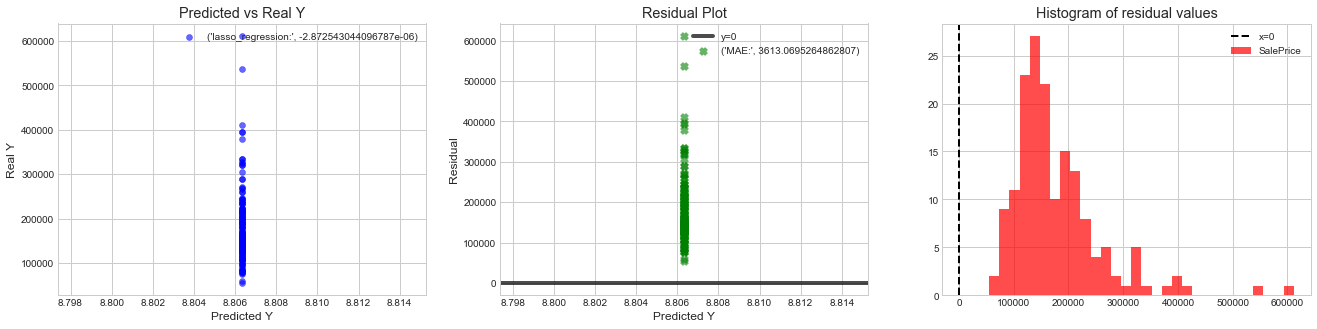

In [88]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Get the current axis out of the figure.
ax = fig.gca()
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]


# Predicted vs Real y
ax1.scatter(lasso.predict(Xs_test_nf), y_test, color='blue', alpha=0.6, label=("lasso_regression:", lasso.score(Xs_test_nf, y_test_nf)))
ax1.set_xlabel('Predicted Y')
ax1.set_ylabel('Real Y')
ax1.legend(loc='best')
ax1.set_title('Predicted vs Real Y')

ax2.scatter(lasso.predict(Xs_test_nf), y_test-lasso.predict(Xs_test_nf), color='green', marker='x', alpha=0.6, label=("MAE:", mean_absolute_error(y_test_nf, lasso.predict(Xs_test_nf))))
ax2.set_xlabel('Predicted Y')
ax2.set_ylabel('Residual')
ax2.axhline(y=0, color='black', alpha=0.7, label='y=0')
ax2.legend(loc='best')
ax2.set_title('Residual Plot')

ax3.hist(y_test - lasso.predict(Xs_test_nf), bins=30, color='red', alpha=0.7)
ax3.set_title('Histogram of residual values')
ax3.axvline(x=0, color='black', linestyle='--', lw=2, label='x=0')
ax3.legend(loc='best')


In [89]:
#Cross-validate the linear R2 with the optimal alpha
lasso_coefs = pd.DataFrame({'variable':Xs_train_nf.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs.head(20)


abs_coef  coef      variable
0        0.0   0.0  OverallGrade
10       0.0   0.0  BsmtExposure
17       0.0  -0.0         Fence
16       0.0   0.0    PavedDrive
15       0.0   0.0  GarageFinish
14       0.0   0.0    CentralAir
13       0.0   0.0     HeatingQC
12       0.0   0.0  BsmtFinType2
11       0.0   0.0  BsmtFinType1
9        0.0   0.0      BsmtCond
1        0.0   0.0   GarageGrade
8        0.0   0.0      BsmtQual
7        0.0   0.0    AllPorchSF
6        0.0   0.0     AllFlrsSF
5        0.0   0.0     PoolScore
4        0.0  -0.0   GarageScore
3        0.0  -0.0  KitchenScore
2        0.0  -0.0    ExterGrade
18       0.0  -0.0        YrSold

### Elastic Net

In [90]:
elastic = ElasticNetCV()

elastic.fit(Xs_train_nf, y_train_nf)

print "Elastic Regression- Test R2 score:", elastic.score(Xs_test_nf, y_test_nf)


Elastic Regression- Test R2 score: 0.00015962579372474917


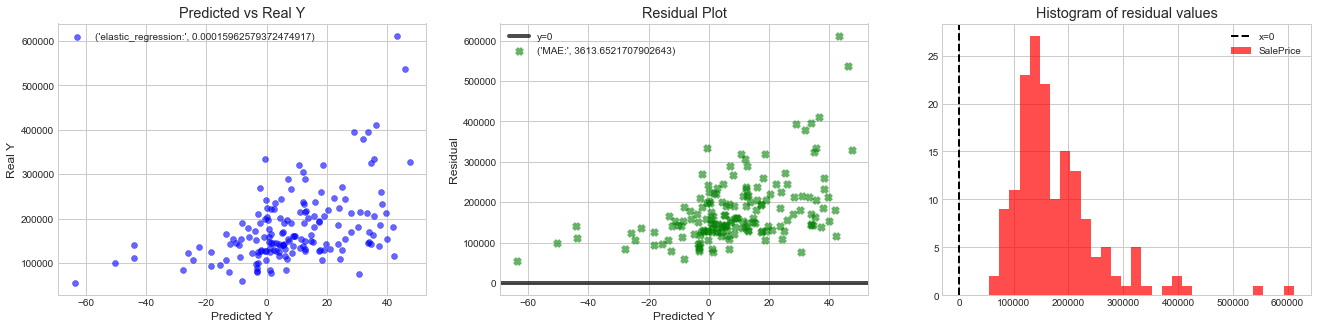

In [91]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Get the current axis out of the figure.
ax = fig.gca()
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]


# Predicted vs Real y
ax1.scatter(elastic.predict(Xs_test_nf), y_test, color='blue', alpha=0.6, label=("elastic_regression:", elastic.score(Xs_test_nf, y_test_nf)))
ax1.set_xlabel('Predicted Y')
ax1.set_ylabel('Real Y')
ax1.legend(loc='best')
ax1.set_title('Predicted vs Real Y')

ax2.scatter(elastic.predict(Xs_test_nf), y_test-elastic.predict(Xs_test_nf), color='green', marker='x', alpha=0.6, label=("MAE:", mean_absolute_error(y_test_nf, elastic.predict(Xs_test_nf))))
ax2.set_xlabel('Predicted Y')
ax2.set_ylabel('Residual')
ax2.axhline(y=0, color='black', alpha=0.7, label='y=0')
ax2.legend(loc='best')
ax2.set_title('Residual Plot')

ax3.hist(y_test - elastic.predict(Xs_test_nf), bins=30, color='red', alpha=0.7)
ax3.set_title('Histogram of residual values')
ax3.axvline(x=0, color='black', linestyle='--', lw=2, label='x=0')
ax3.legend(loc='best')


In [92]:
elastic_coefs = pd.DataFrame({'variable':Xs_train_nf.columns,
                            'coef':elastic.coef_,
                            'abs_coef':np.abs(elastic.coef_)})

elastic_coefs.sort_values('abs_coef', inplace=True, ascending=False)

elastic_coefs.head(20)


abs_coef       coef      variable
10  11.670164  11.670164  BsmtExposure
11   4.899900   4.899900  BsmtFinType1
17   3.790164  -3.790164         Fence
13   3.712899   3.712899     HeatingQC
16   3.564239   3.564239    PavedDrive
3    3.331668  -3.331668  KitchenScore
7    2.939460   2.939460    AllPorchSF
9    2.382755   2.382755      BsmtCond
5    2.165860   2.165860     PoolScore
14   1.895728   1.895728    CentralAir
4    1.041690  -1.041690   GarageScore
8    0.331130   0.331130      BsmtQual
1    0.318999   0.318999   GarageGrade
0    0.253369   0.253369  OverallGrade
6    0.026169   0.026169     AllFlrsSF
12   0.000000   0.000000  BsmtFinType2
15   0.000000   0.000000  GarageFinish
2    0.000000  -0.000000    ExterGrade
18   0.000000  -0.000000        YrSold

### GridSearch and Stochastic Gradient Descent (SGD)

In [93]:
tuned_parameters = {'alpha': np.linspace(0,1,25), 
                   'penalty': ['l1', 'l2'],
                   'loss': ['squared_loss','huber']}

sgd_reg = SGDRegressor()
sgd_reg_gs = GridSearchCV(sgd_reg, tuned_parameters, cv=9, verbose=False)


sgd_reg_gs.fit(Xs_train_nf, y_train_nf)


print sgd_reg_gs.best_params_
print sgd_reg_gs.best_score_
sgd_reg = sgd_reg_gs.best_estimator_


{'penalty': 'l2', 'alpha': 0.0, 'loss': 'huber'}
-0.0054180704841


In [94]:
sgd_reg

SGDRegressor(alpha=0.0, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='huber', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [95]:
print "SGD Regression- Test R2 score:", sgd_reg_gs.score(Xs_test_nf, y_test_nf)

SGD Regression- Test R2 score: 2.4946043237772386e-06


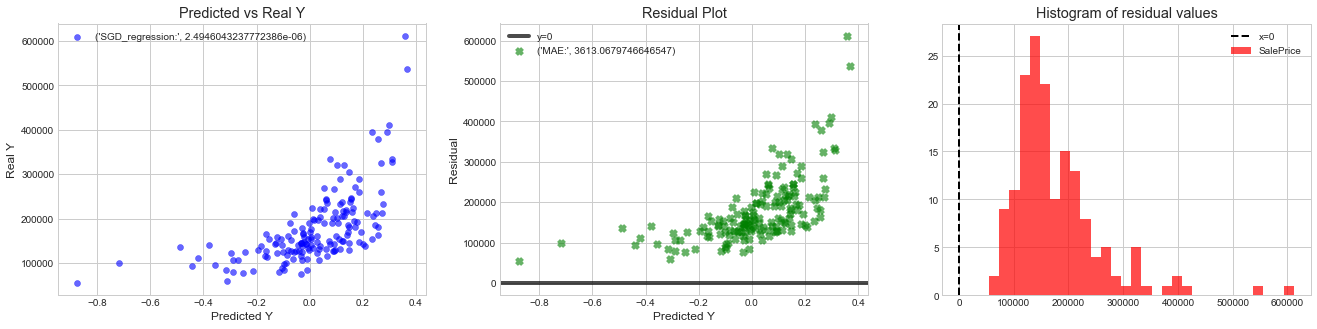

In [96]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Get the current axis out of the figure.
ax = fig.gca()
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]

# Predicted vs Real y
ax1.scatter(sgd_reg_gs.predict(Xs_test_nf), y_test, color='blue', alpha=0.6, label=("SGD_regression:", sgd_reg_gs.score(Xs_test_nf, y_test_nf)))
ax1.set_xlabel('Predicted Y')
ax1.set_ylabel('Real Y')
ax1.legend(loc='best')
ax1.set_title('Predicted vs Real Y')

ax2.scatter(sgd_reg_gs.predict(Xs_test_nf), y_test-sgd_reg_gs.predict(Xs_test_nf), color='green', marker='x', alpha=0.6, label=("MAE:", mean_absolute_error(y_test_nf, sgd_reg_gs.predict(Xs_test_nf))))
ax2.set_xlabel('Predicted Y')
ax2.set_ylabel('Residual')
ax2.axhline(y=0, color='black', alpha=0.7, label='y=0')
ax2.legend(loc='best')
ax2.set_title('Residual Plot')

ax3.hist(y_test - sgd_reg_gs.predict(Xs_test_nf), bins=30, color='red', alpha=0.7)
ax3.set_title('Histogram of residual values')
ax3.axvline(x=0, color='black', linestyle='--', lw=2, label='x=0')
ax3.legend(loc='best')


In [97]:
value_coefs = pd.DataFrame({'coef':sgd_reg.coef_,
                            'abs_coef':np.abs(sgd_reg.coef_),
                            'variable':Xs_train_nf.columns})
value_coefs.sort_values('abs_coef', ascending=False, inplace=True)
value_coefs.head(20)


abs_coef      coef      variable
10  0.063355  0.063355  BsmtExposure
11  0.039942  0.039942  BsmtFinType1
14  0.037098  0.037098    CentralAir
16  0.035681  0.035681    PavedDrive
17  0.029954 -0.029954         Fence
13  0.029332  0.029332     HeatingQC
15  0.027711  0.027711  GarageFinish
5   0.026863  0.026863     PoolScore
3   0.026848 -0.026848  KitchenScore
7   0.025882  0.025882    AllPorchSF
9   0.022175  0.022175      BsmtCond
18  0.021215  0.021215        YrSold
0   0.018861  0.018861  OverallGrade
1   0.018754  0.018754   GarageGrade
8   0.013012  0.013012      BsmtQual
4   0.008435  0.008435   GarageScore
12  0.005107 -0.005107  BsmtFinType2
6   0.002052  0.002052     AllFlrsSF
2   0.001617  0.001617    ExterGrade

### Random Search and Random Forest

In [98]:
#use a randomized search due to large number of parameters
from sklearn.model_selection import RandomizedSearchCV
random_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10]
}

In [99]:
rf = RandomForestRegressor()
# Random search of parameters, using 9 fold cross validation, 
# search across 1800 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 200, cv = 9, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(Xs_train_nf, y_train_nf)
print rf_random.best_score_
print rf_random.best_params_

Fitting 9 folds for each of 200 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 235 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 641 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 1207 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 1785 out of 1800 | elapsed:   22.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:   22.4s finished


-0.0592821171926887
{'min_samples_split': 10, 'max_features': 'sqrt', 'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4}


In [100]:
rf2 = RandomForestRegressor(min_samples_split= 5,
                             max_features= 'sqrt',
                             bootstrap= True,
                             max_depth= 10,
                             min_samples_leaf= 4)

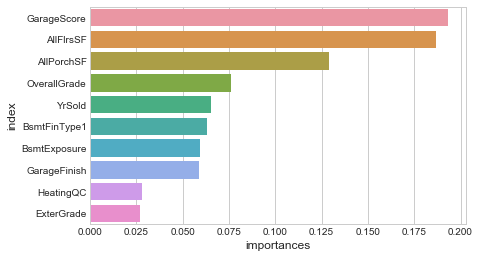

In [101]:
rf2.fit(Xs_train_nf, y_train_nf)
importances = rf2.feature_importances_
std = np.std([rf2.feature_importances_ for tree in rf2.estimators_],
             axis=0)
fea_imp = pd.DataFrame(zip(importances,std), Xs_train_nf.columns.values, columns = ['importances', 'std'])
fea_imp = fea_imp.sort_values('importances', ascending=False).reset_index()
sns.barplot('importances', 'index', data=fea_imp[:10])

In [102]:
print "Random Forest Regression- Test R2 score:", rf2.score(Xs_test_nf, y_test_nf)

Random Forest Regression- Test R2 score: -0.078585787474869


In [103]:
fea_imp[:10]

index  importances           std
0   GarageScore     0.193234  2.775558e-17
1     AllFlrsSF     0.186529  2.775558e-17
2    AllPorchSF     0.129243  2.775558e-17
3  OverallGrade     0.075933  0.000000e+00
4        YrSold     0.065061  1.387779e-17
5  BsmtFinType1     0.063082  1.387779e-17
6  BsmtExposure     0.059299  0.000000e+00
7  GarageFinish     0.058707  1.387779e-17
8     HeatingQC     0.028270  0.000000e+00
9    ExterGrade     0.026917  0.000000e+00

### Grid Search and XGBoost

In [104]:
xgb = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

In [105]:
xgb_grid = GridSearchCV(xgb,
                        parameters,
                        cv = 9,
                        n_jobs = -1,
                        verbose=True)

xgb_grid.fit(Xs_train_nf,
         y_train_nf)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)


Fitting 9 folds for each of 9 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   23.2s finished


-0.229447481276
{'colsample_bytree': 0.7, 'silent': 1, 'learning_rate': 0.03, 'nthread': 4, 'min_child_weight': 4, 'n_estimators': 500, 'subsample': 0.7, 'objective': 'reg:linear', 'max_depth': 5}


In [106]:
xgb = XGBRegressor(colsample_bytree = 0.7, silent = 1, learning_rate = 0.03, nthread = 4, min_child_weight = 4, n_estimators = 500, subsample = 0.7, objective = 'reg:linear', max_depth = 5)

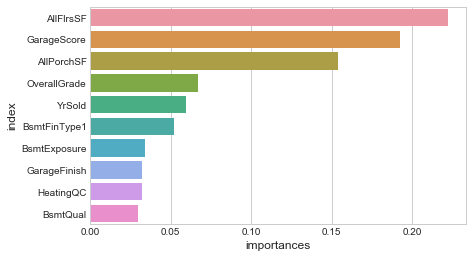

In [107]:
folds = 9
param_comb = 5
# skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 2)
# random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=-1, cv=skf.split(Xs_train, y_train), verbose=3, random_state=99 )
# # Here we go
xgb.fit(Xs_train_nf, y_train_nf)

importances = xgb.feature_importances_
fea_imp_1 = pd.DataFrame(importances, Xs_train_nf.columns.values, columns = ['importances'])
fea_imp_1 = fea_imp_1.sort_values('importances', ascending=False).reset_index()
sns.barplot('importances', 'index', data=fea_imp_1[:10])


In [108]:
fea_imp_1.head(10)

index  importances
0     AllFlrsSF     0.222191
1   GarageScore     0.192491
2    AllPorchSF     0.154198
3  OverallGrade     0.066779
4        YrSold     0.059587
5  BsmtFinType1     0.052396
6  BsmtExposure     0.033810
7  GarageFinish     0.032315
8     HeatingQC     0.032222
9      BsmtQual     0.029887

In [109]:
print "XGB Regression- Test R2 score:", xgb.score(Xs_test_nf, y_test_nf)

XGB Regression- Test R2 score: -0.16380683178769662


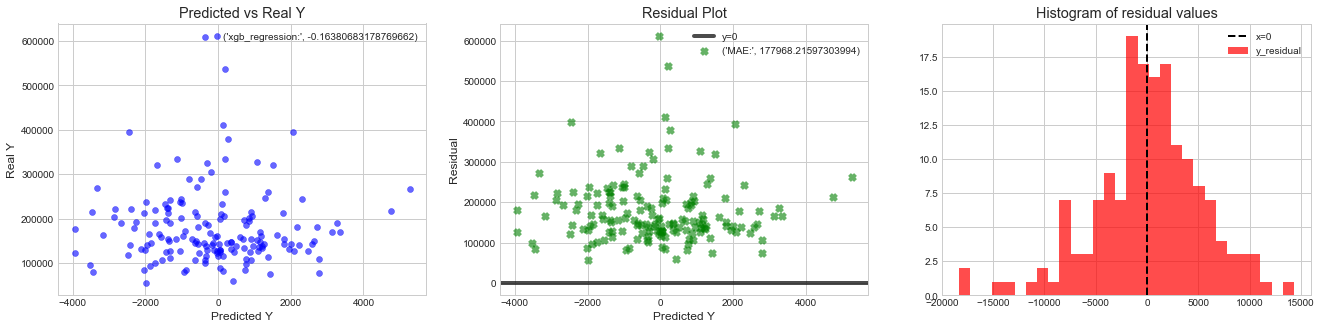

In [110]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Get the current axis out of the figure.
ax = fig.gca()
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]

# Predicted vs Real y
ax1.scatter(xgb.predict(Xs_test_nf), y_test, color='blue', alpha=0.6, label=("xgb_regression:", xgb.score(Xs_test_nf, y_test_nf)))
ax1.set_xlabel('Predicted Y')
ax1.set_ylabel('Real Y')
ax1.legend(loc='best')
ax1.set_title('Predicted vs Real Y')

ax2.scatter(xgb.predict(Xs_test_nf), y_test-xgb.predict(Xs_test_nf), color='green', marker='x', alpha=0.6, label=("MAE:", mean_absolute_error(y_test, xgb.predict(Xs_test_nf))))
ax2.set_xlabel('Predicted Y')
ax2.set_ylabel('Residual')
ax2.axhline(y=0, color='black', alpha=0.7, label='y=0')
ax2.legend(loc='best')
ax2.set_title('Residual Plot')

ax3.hist(y_test_nf - xgb.predict(Xs_test_nf), bins=30, color='red', alpha=0.7)
ax3.set_title('Histogram of residual values')
ax3.axvline(x=0, color='black', linestyle='--', lw=2, label='x=0')
ax3.legend(loc='best')


## All score

In [111]:
rr_columns = rr_coefs.variable.values
lasso_columns = lasso_coefs.variable.values
elastic_columns = elastic_coefs.variable.values
sgd_reg_columns = value_coefs.variable.values
rf_random_columns = fea_imp['index'].values
xgb_columns = fea_imp_1['index'].values


In [112]:
# Defining functions to test our best features head to head.

def score_ridge(Xs_test):
    scores_ridge = cross_val_score(rr, Xs_test_nf, y_test_nf, cv=9)
    return scores_ridge.mean(), scores_ridge.std()

def score_lasso(Xs_test_nf):
    scores_lasso = cross_val_score(lasso, Xs_test_nf, y_test_nf, cv=9)
    return scores_lasso.mean(), scores_lasso.std()

def score_elastic(Xs_test):
    scores_elastic = cross_val_score(elastic, Xs_test_nf, y_test_nf, cv=9)
    return scores_elastic.mean(), scores_elastic.std()

def score_sgd(Xs_test):
    scores_sgd = cross_val_score(sgd_reg, Xs_test_nf, y_test_nf, cv=9)
    return scores_sgd.mean(), scores_sgd.std()

def score_rf_random(Xs_test):
    scores_rf_random = cross_val_score(rf2, Xs_test_nf, y_test_nf, cv=9)
    return scores_rf_random.mean(), scores_rf_random.std()

def score_xgb(Xs_test):
    scores_xgb = cross_val_score(xgb, Xs_test_nf, y_test_nf, cv=9)
    return scores_xgb.mean(), scores_xgb.std()


all_scores_test = [
    score_ridge(Xs_test_nf[rr_columns]),
    score_lasso(Xs_test_nf[lasso_columns]),
    score_elastic(Xs_test_nf[elastic_columns]),
    score_sgd(Xs_test_nf[sgd_reg_columns]),
    score_rf_random(Xs_test_nf[rf_random_columns]),
    score_xgb(Xs_test_nf[xgb_columns])
]

# Putting results into a DataFrame.
all_scores = pd.DataFrame(all_scores_test, columns=['test mean score', 'test std score'], index = ['ridge_model', 'lasso_model', 'elastic_model', 'sgd_model', 'rf_model', 'xgb_model'])
all_scores

test mean score  test std score
ridge_model          -0.058143        0.059564
lasso_model          -0.058221        0.059238
elastic_model        -0.054717        0.058366
sgd_model            -0.042759        0.046575
rf_model             -0.161122        0.238358
xgb_model            -0.829324        0.500332

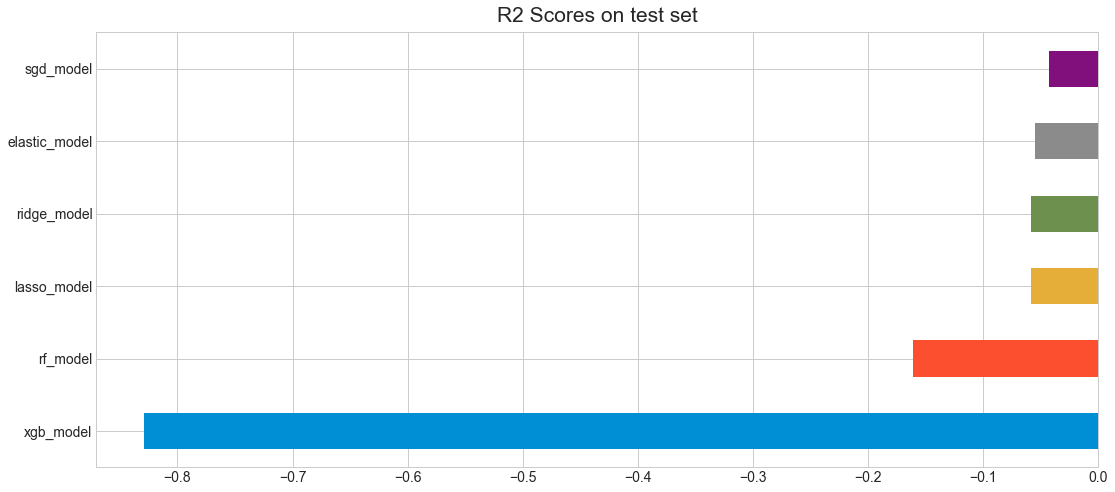

In [113]:
# set the title
plt.title('R2 Scores on test set', fontsize=21, y=1.01)

ax = all_scores['test mean score'].sort_values(ascending=True).plot(kind='barh', 
            figsize=(16,8), 
            fontsize=14)


## The score of the second model (residual) is low. It is not considered as a good model for prediction

**Why the score is so low?**


**If the score for model from question 1 is very high, that means the moedel is very reliable. Hence, the gap (residual y) between actual y and predicted y should be very small. Hence, the non-fixed features should be predict the residual y well.**

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. What property characteristics predict an "abnormal" sale?

---

The `SaleCondition` feature indicates the circumstances of the house sale. From the data file, we can see that the possibilities are:

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       
One of the executives at your company has an "in" with higher-ups at the major regional bank. His friends at the bank have made him a proposal: if he can reliably indicate what features, if any, predict "abnormal" sales (foreclosures, short sales, etc.), then in return the bank will give him first dibs on the pre-auction purchase of those properties (at a dirt-cheap price).

He has tasked you with determining (and adequately validating) which features of a property predict this type of sale. 

---

**Your task:**
1. Determine which features predict the `Abnorml` category in the `SaleCondition` feature.
- Justify your results.

This is a challenging task that tests your ability to perform classification analysis in the face of severe class imbalance. You may find that simply running a classifier on the full dataset to predict the category ends up useless: when there is bad class imbalance classifiers often tend to simply guess the majority class.

It is up to you to determine how you will tackle this problem. I recommend doing some research to find out how others have dealt with the problem in the past. Make sure to justify your solution. Don't worry about it being "the best" solution, but be rigorous.

Be sure to indicate which features are predictive (if any) and whether they are positive or negative predictors of abnormal sales.

In [114]:
# check out the value counts
house.SaleCondition.value_counts()

Normal     1155
Partial     103
Abnorml      92
Family       20
Alloca       11
AdjLand       4
Name: SaleCondition, dtype: int64

In [115]:
# code up the target binary class variable
abnorm = house.SaleCondition.map(lambda x: 1 if x == 'Abnorml' else 0)
abnorm.value_counts(dropna=False)

0    1293
1      92
Name: SaleCondition, dtype: int64

In [116]:
abnorm = abnorm.values

In [180]:
# build a patsy formula for the design matrix. I'm going to throw everything
# at it in a bit - you'll see soon enough.
abnorm_f = house_final

In [169]:
import patsy

In [181]:
Xabn = patsy.dmatrix(abnorm_f, data=house_final, return_type='dataframe')

In [182]:
Xabn

MSSubClass  LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  \
0             60         65.0     8450       2003          2003       196.0   
1             20         80.0     9600       1976          1976         0.0   
2             60         68.0    11250       2001          2002       162.0   
3             70         60.0     9550       1915          1970         0.0   
4             60         84.0    14260       2000          2000       350.0   
5             50         85.0    14115       1993          1995         0.0   
6             20         75.0    10084       2004          2005       186.0   
7             60          0.0    10382       1973          1973       240.0   
8             50         51.0     6120       1931          1950         0.0   
9            190         50.0     7420       1939          1950         0.0   
10            20         70.0    11200       1965          1965         0.0   
11            60         85.0    11924       2005          2006       286.0   
12            20          0.0    12968       1962          1962         0.0   
13            20         91.0    10652       2006          2007       306.0   
14            20          0.0    10920       1960          1960       212.0   
15            45         51.0     6120       1929          2001         0.0   
16            20          0.0    11241       1970          1970       180.0   
17            90         72.0    10791       1967          1967         0.0   
18            20         66.0    13695       2004          2004         0.0   
19            20         70.0     7560       1958          1965         0.0   
20            60        101.0    14215       2005          2006       380.0   
21            45         57.0     7449       1930          1950         0.0   
22            20         75.0     9742       2002          2002       281.0   
23           120         44.0     4224       1976          1976         0.0   
24            20          0.0     8246       1968          2001         0.0   
25            20        110.0    14230       2007          2007       640.0   
26            20         60.0     7200       1951          2000         0.0   
27            20         98.0    11478       2007          2008       200.0   
28            20         47.0    16321       1957          1997         0.0   
29            30         60.0     6324       1927          1950         0.0   
...          ...          ...      ...        ...           ...         ...   
1428          30         60.0     7200       1940          1992       294.0   
1429          20          0.0    12546       1981          1981       310.0   
1430          60         60.0    21930       2005          2005         0.0   
1431         120          0.0     4928       1976          1976         0.0   
1432          30         60.0    10800       1927          2007         0.0   
1433          60         93.0    10261       2000          2000       318.0   
1434          20         80.0    17400       1977          1977         0.0   
1435          20         80.0     8400       1962          2005       237.0   
1436          20         60.0     9000       1971          1971         0.0   
1437          20         96.0    12444       2008          2008       426.0   
1438          20         90.0     7407       1957          1996         0.0   
1439          60         80.0    11584       1979          1979        96.0   
1440          70         79.0    11526       1922          1994         0.0   
1441         120          0.0     4426       2004          2004       147.0   
1443          30          0.0     8854       1916          1950         0.0   
1444          20         63.0     8500       2004          2004       106.0   
1445          85         70.0     8400       1966          1966         0.0   
1446          20          0.0    26142       1962          1962       189.0   
1447          60         80.0    10000       1995       

In [183]:
# gotta standardize!
ss = StandardScaler()
Xabns = ss.fit_transform(Xabn)
Xabns = pd.DataFrame(Xabns, columns=Xabn.columns)

In [134]:
# import the gradient descent classifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

In [187]:
# Below is a function to bootstrap ridge regression coefficients
# while downsampling. Here is my procedure:
# 1. Downsample the data to the abnormal observations and an
# equal number of randomly sampled with replacement samples from
# the other sale types.
# 2. For a set number of bootstrap iterations, fit an optimized
# ridge regression on the downsampled & bootstrapped data.
# 3. Save the coefficients (and scores) on each iteration
#
# I will use the boostrapped coefficients to find the confidence
# intervals around the coefficients for each of the predictors.
# The downsampling allows the classifier to perform properly.
#
# Any coefficients with 0. in their 95% confidence interval range
# will be removed - only those consistently above or below
# 0 will be kept as "real" predictors of abnormal sales.

def downsample_boot_coefs(X, y, iters=100):
    coefs = []
    cv_scores = []
    alphas = []
    
    pos = np.where(y == 1)[0]
    neg = np.where(y == 0)[0]
    
    lr_params = {
        'penalty':['l2'],
        'loss':['log'],
        'alpha':np.logspace(-4,2,30),
        'n_iter':[5]
    }
    
    for i in range(iters):
            
        neg_inds = np.random.choice(neg, size=len(pos), replace=True)
        inds = np.concatenate([pos, neg_inds])
        
        X_, y_ = X.iloc[inds, :], y[inds]
        
        lr_sgd_gs = GridSearchCV(SGDClassifier(), lr_params, cv=5)
        lr_sgd_gs.fit(X_, y_)
        
        cv_scores.append(lr_sgd_gs.best_score_)
        coefs.append(lr_sgd_gs.best_estimator_.coef_)
        alphas.append(lr_sgd_gs.best_params_['alpha'])
        
        if (i % 10) == 0:
            print i, np.mean(cv_scores), np.std(cv_scores), np.mean(alphas)
        
    return coefs, cv_scores

In [167]:
Xabns.shape

(1380, 148)

In [168]:
abnorm.shape

(1385L,)

In [188]:
coefs, scores = downsample_boot_coefs(Xabns, abnorm)

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

0 1.0 0.0 0.20433597178569418


D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

10 0.9980237154150199 0.003493610578984934 0.18034952162701462


D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

20 0.9981884057971016 0.0034913917089109997 0.1627604575374732


D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

30 0.9985974754558204 0.0030767757319046843 0.14903535698204787


D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

40 0.9982767762460234 0.003687812233097449 0.1560678275780657


D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

50 0.9986146632566071 0.003376594100118262 0.14754725444910746


D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

60 0.9983071988595867 0.00387946205578711 0.16827063845006598


D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

70 0.9983925290875689 0.003804278518000365 0.1682910933299821


D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

80 0.9983896940418681 0.003667646368415585 0.16675672794783256


D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

90 0.9983277591973245 0.0037525747903499854 0.172742911419444


D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochast

In [189]:
np.mean(scores)

0.9983152173913044

In [190]:
# Put the bootstrapped coefficients into a dataframe.
coef_mat = np.array([x[0] for x in coefs])
coef_mat = pd.DataFrame(coef_mat, columns=Xabns.columns)

In [191]:
coef_mat.head()

MSSubClass  LotFrontage   LotArea  YearBuilt  YearRemodAdd  MasVnrArea  \
0    0.027858    -0.044137 -0.006806   0.000514     -0.055718   -0.023732   
1   -0.003165    -0.022516 -0.009185  -0.028073     -0.042725   -0.018554   
2   -0.000287     0.012505  0.033310  -0.027099     -0.043111   -0.010016   
3    0.018612     0.004606 -0.011173  -0.096556     -0.064325   -0.053943   
4   -0.007286    -0.015038  0.001798  -0.016181     -0.047625   -0.018880   

   BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1     ...      \
0 -0.022587 -0.009037     -0.027754      0.019358     ...       
1 -0.023947  0.014073     -0.028065      0.019061     ...       
2  0.014921 -0.001505     -0.055292      0.027951     ...       
3  0.043704  0.051379      0.002131      0.134701     ...       
4 -0.034093  0.022151     -0.027038      0.014245     ...       

   SaleCondition_Partial  OverallGrade  GarageGrade  ExterGrade  KitchenScore  \
0              -0.091191     -0.053063    -0.060687   -0.032953      0.019795   
1              -0.066897     -0.015534    -0.030693   -0.027015     -0.000931   
2              -0.118657     -0.011724    -0.018288   -0.053187     -0.009300   
3              -0.199461     -0.093675    -0.144941   -0.026650      0.035016   
4              -0.080736     -0.056466    -0.034229   -0.011349      0.032435   

   FireplaceScore  GarageScore  PoolScore  AllFlrsSF  AllPorchSF  
0       -0.059620    -0.053363   0.070728  -0.010279    0.037904  
1       -0.030191    -0.019877   0.039744  -0.006687    0.022094  
2       -0.086104    -0.047231   0.234004  -0.026427    0.116848  
3        0.016949    -0.111351   0.253370  -0.124568    0.115093  
4       -0.041552    -0.036631   0.065311  -0.014430    0.042290  

[5 rows x 221 columns]

In [193]:
import scipy.stats as stats
# calculate the lower 2.5th percentile coef, upper 97.5th percentile coef,
# and the median coefficient.
# The features whose 95% confidence intervals do not include 0 are kept
lower = coef_mat.apply(lambda x: stats.scoreatpercentile(x, 2.5), axis=0)
median = coef_mat.apply(lambda x: np.median(x), axis=0)
upper = coef_mat.apply(lambda x: stats.scoreatpercentile(x, 97.5), axis=0)

In [194]:
np.sum(lower*upper > 0)

20

In [195]:
valid_features = [c for i,c in enumerate(coef_mat.columns) if i in np.where((lower*upper > 0).values)[0]]
valid_features

['YearRemodAdd',
 'SalePrice',
 'MSZoning_RH',
 'Utilities_AllPub',
 'Utilities_NoSeWa',
 'Condition2_Artery',
 'Exterior1st_BrkComm',
 'Exterior1st_Stone',
 'Exterior2nd_Wd Sdng',
 'Exterior2nd_Wd Shng',
 'MasVnrType_BrkCmn',
 'Electrical_Mix',
 'Functional_Sev',
 'SaleType_COD',
 'SaleType_New',
 'SaleType_Oth',
 'SaleCondition_Abnorml',
 'SaleCondition_Normal',
 'SaleCondition_Partial',
 'PoolScore']

In [196]:
median[valid_features]

YearRemodAdd            -0.053525
SalePrice               -0.044715
MSZoning_RH              0.049979
Utilities_AllPub        -0.012736
Utilities_NoSeWa         0.012736
Condition2_Artery        0.029812
Exterior1st_BrkComm      0.018750
Exterior1st_Stone        0.045930
Exterior2nd_Wd Sdng     -0.038175
Exterior2nd_Wd Shng      0.039834
MasVnrType_BrkCmn        0.063343
Electrical_Mix           0.029546
Functional_Sev           0.021776
SaleType_COD             0.159698
SaleType_New            -0.075865
SaleType_Oth             0.057423
SaleCondition_Abnorml    0.950664
SaleCondition_Normal    -0.547634
SaleCondition_Partial   -0.084145
PoolScore                0.060099
dtype: float64

In [ ]:
# These are the valid features indicating forclosure vs. not.
# features predicting forclosure:
# 1. MSZoning_RH
# 2. Utilities_NoSeWa
# 3. Condition2_Artery
# 4. Exterior1st_BrkComm
# 5. Exterior1st_Stone
# 6. Exterior2nd_Wd Shng
# 7. MasVnrType_BrkCmn
# 8. Electrical_Mix
# 9. Functional_Sev
# 10. SaleType_COD
# 11. SaleType_Oth
# 12. SaleCondition_Abnorml
# 13. PoolScore

# features predicting against forclosure:
# 1. YearRemodAdd
# 2. SalePrice 
# 3. Utilities_AllPub
# 4. Exterior2nd_Wd Sdng
# 5. SaleType_New 
# 6. SaleCondition_Normal
# 7. SaleCondition_Partial